In [204]:
# Import libraries
! pip install fuzzywuzzy
!pip install wordcloud

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import seaborn as sns
from wordcloud import WordCloud
import textwrap
import plotly.graph_objects as go
import matplotlib.patches as mpatches

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash

The datasets used in this python notebook have been downloaded from the AACT website. To downlaod these datasets, I used Query SQL to fetch the desired tables. Those are:
- **uk_only_filtered_20**
    - includes all interventional clinical trials carried out in the UK from 2002-2022
        - search included the words: UK, United Kingdom, Scotland, Wales, Northern Ireland, NI and England.
- **interventions**
    - includes the drugs/genes tested in the clinical trial
- **baseline_measurements**
    - includes trials that released results AND the race/ethnicity deistributions of trilas if released

In [2]:
# load the data
uk_filtered = pd.read_csv('https://raw.githubusercontent.com/AndreasPetrou/UCL_dissertation.github.io/main/UK%20Exclusive%20trials/uk_only_fitlered_20.csv')
interventions = pd.read_csv("https://www.dropbox.com/scl/fi/61azua3h4gpf0buh16zvm/interventions.csv?rlkey=rp5w07cwzhl27sdcoqk26dmez&dl=1")
baseline = pd.read_csv("https://www.dropbox.com/scl/fi/2thduro77e68h1uiw4ugo/baseline_measurements.csv?rlkey=gxafeel0gdz9yr8h6sd1kntib&dl=1")

/tmp/ipykernel_195/1677733125.py:2: DtypeWarning: Columns (5,13,14,15,37,46,70) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_filtered = pd.read_csv('https://raw.githubusercontent.com/AndreasPetrou/UCL_dissertation.github.io/main/UK%20Exclusive%20trials/uk_only_fitlered_20.csv')
/tmp/ipykernel_195/1677733125.py:4: DtypeWarning: Columns (10,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  baseline = pd.read_csv("https://www.dropbox.com/scl/fi/2thduro77e68h1uiw4ugo/baseline_measurements.csv?rlkey=gxafeel0gdz9yr8h6sd1kntib&dl=1")


# Data Cleaning

## uk_filtered_20

In [3]:
uk_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   nct_id                               8768 non-null   object 
 1   nct_id-2                             8768 non-null   object 
 2   nlm_download_date_description        0 non-null      float64
 3   study_first_submitted_date           8768 non-null   object 
 4   results_first_submitted_date         824 non-null    object 
 5   disposition_first_submitted_date     44 non-null     object 
 6   last_update_submitted_date           8768 non-null   object 
 7   study_first_submitted_qc_date        8768 non-null   object 
 8   study_first_posted_date              8768 non-null   object 
 9   study_first_posted_date_type         8768 non-null   object 
 10  results_first_submitted_qc_date      824 non-null    object 
 11  results_first_posted_date     

In [4]:
uk_filtered.head()

,nct_id,nct_id-2,nlm_download_date_description,study_first_submitted_date,results_first_submitted_date,disposition_first_submitted_date,last_update_submitted_date,study_first_submitted_qc_date,study_first_posted_date,study_first_posted_date_type,...,plan_to_share_ipd,plan_to_share_ipd_description,created_at,updated_at,source_class,delayed_posting,expanded_access_nctid,expanded_access_status_for_nctid,fdaaa801_violation,baseline_type_units_analyzed
0,NCT00032175,NCT00032175,NaN,2002-03-08,NaN,NaN,2013-06-25,2003-01-26,2003-01-27,Estimate,...,NaN,NaN,2023-06-04 18:34:12.563641,2023-06-04 18:34:12.563641,NIH,NaN,NaN,NaN,NaN,NaN
1,NCT00040690,NCT00040690,NaN,2002-07-08,NaN,NaN,2013-12-18,2003-01-26,2003-01-27,Estimate,...,NaN,NaN,2023-06-04 17:56:50.357212,2023-06-04 17:56:50.357212,NIH,NaN,NaN,NaN,NaN,NaN
2,NCT00041223,NCT00041223,NaN,2002-07-08,NaN,NaN,2013-11-05,2003-01-26,2003-01-27,Estimate,...,NaN,NaN,2023-06-04 18:59:44.638606,2023-06-04 18:59:44.638606,NIH,NaN,NaN,NaN,NaN,NaN
3,NCT00041262,NCT00041262,NaN,2002-07-08,NaN,NaN,2013-08-09,2003-01-26,2003-01-27,Estimate,...,NaN,NaN,2023-06-04 18:59:45.904978,2023-06-04 18:59:45.904978,NIH,NaN,NaN,NaN,NaN,NaN
4,NCT00045045,NCT00045045,NaN,2002-09-06,NaN,NaN,2013-12-17,2003-01-26,2003-01-27,Estimate,...,NaN,NaN,2023-06-04 19:36:09.253206,2023-06-04 19:36:09.253206,NIH,NaN,NaN,NaN,NaN,NaN


In [5]:
uk_filtered.drop(['nct_id-2'], axis=1, inplace=True)

In [6]:
# drop unwanted columns
uk_filtered = uk_filtered.iloc[:, [0,20,33,34,35,37,38,39,42]]

In [7]:
uk_filtered.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms
0,NCT00032175,2002-04-30,Gemcitabine With or Without Capecitabine in Tr...,A Phase III Multicenter Randomized Clinical Tr...,Completed,Phase 3,508.0,Anticipated,NaN
1,NCT00040690,2008-11-30,Combination Chemotherapy in Treating Patients ...,A Clinicopathological Study In Burkitts's And ...,Completed,Phase 2,120.0,Anticipated,NaN
2,NCT00041223,2002-09-30,IH636 Grape Seed Extract in Treating Hardening...,"Double-Blind, Placebo-Controlled, Randomized P...",Unknown status,Phase 2,NaN,NaN,NaN
3,NCT00041262,2004-11-30,Combination Chemotherapy in Treating Patients ...,A Prospective Randomized Trial Comparing Stand...,Unknown status,Phase 3,1300.0,Anticipated,NaN
4,NCT00045045,2002-05-31,Positron Emission Tomography in Detecting Test...,A Study Of 18 FDG PET In The Prediction Of Rel...,Completed,Not Applicable,NaN,NaN,NaN


In [8]:
uk_filtered["nct_id"].nunique()

8768

There were **8768** unique clinical trials carried out in the UK from 01/01/2002 to 31/12/2022.

## interventions

In [9]:
interventions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771642 entries, 0 to 771641
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 771642 non-null  int64 
 1   nct_id             771642 non-null  object
 2   intervention_type  771642 non-null  object
 3   name               771506 non-null  object
 4   description        680123 non-null  object
dtypes: int64(1), object(4)
memory usage: 29.4+ MB


In [10]:
interventions.head()

,id,nct_id,intervention_type,name,description
0,41203722,NCT01578434,Drug,Vitamin D,Vitamin D: 6 lakh IU single im dose Calcium: 7...
1,41203723,NCT01578434,Drug,Calcium Carbonate,Calcium: 75 mg/kg calcium daily for 3 months
2,41203724,NCT01578434,Drug,Vitamin D and Calcium,Vitamin D: 6 lakh IU single im dose. along wit...
3,40903586,NCT03663959,Procedure,Laparoscopic Pectocolpopexy procedure,"First, the peritoneal layer above and lateral ..."
4,40903587,NCT02836574,Biological,Renal Autologous Cell Therapy (REACT),Autologous selected renal cells (SRC).


In [11]:
interventions.rename(columns={"name": "drug"}, inplace=True)

## baseline_measurements

In [12]:
baseline.head()

,id,nct_id,result_group_id,ctgov_group_code,classification,category,title,description,units,param_type,...,dispersion_type,dispersion_value,dispersion_value_num,dispersion_lower_limit,dispersion_upper_limit,explanation_of_na,number_analyzed,number_analyzed_units,population_description,calculate_percentage
0,96780022,NCT03386773,46152240,BG002,NaN,English,Language,NaN,Participants,Count of Participants,...,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN
1,96780023,NCT03386773,46152238,BG000,NaN,Spanish,Language,NaN,Participants,Count of Participants,...,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN
2,96780024,NCT03386773,46152239,BG001,NaN,Spanish,Language,NaN,Participants,Count of Participants,...,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN
3,97041131,NCT02552121,46228062,BG008,NaN,Female,"Sex: Female, Male",NaN,Participants,Count of Participants,...,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN
4,97041132,NCT02552121,46228054,BG000,NaN,Male,"Sex: Female, Male",NaN,Participants,Count of Participants,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN


In [13]:
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903040 entries, 0 to 1903039
Data columns (total 22 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   nct_id                  object 
 2   result_group_id         int64  
 3   ctgov_group_code        object 
 4   classification          object 
 5   category                object 
 6   title                   object 
 7   description             object 
 8   units                   object 
 9   param_type              object 
 10  param_value             object 
 11  param_value_num         float64
 12  dispersion_type         object 
 13  dispersion_value        object 
 14  dispersion_value_num    float64
 15  dispersion_lower_limit  float64
 16  dispersion_upper_limit  float64
 17  explanation_of_na       object 
 18  number_analyzed         float64
 19  number_analyzed_units   object 
 20  population_description  object 
 21  calculate_percentage    object 

In [14]:
baseline.nct_id.nunique()

58192

In [15]:
# keep only the trials that have reported race/ethnicity to create a dataframe including only those.
race_df = baseline[baseline['title'].str.contains(r'Race|Ethnicity', case=True, regex=True)]

In [16]:
# exclude rows that have 'median' and 'mean' in param_type column
race_df = race_df[race_df['param_type'].isin(['Count of Participants', 'Count of Units', 'Number'])]

In [17]:
race_df = race_df.iloc[:, [1,5,6,8,9,10]]

In [18]:
race_df.head()

,nct_id,category,title,units,param_type,param_value
13,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
14,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
15,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,1.0
16,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0
17,NCT02552121,Hispanic or Latino,Ethnicity (NIH/OMB),Participants,Count of Participants,0.0


In [19]:
race_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671666 entries, 13 to 1903034
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   nct_id       671666 non-null  object
 1   category     560776 non-null  object
 2   title        671666 non-null  object
 3   units        671666 non-null  object
 4   param_type   671666 non-null  object
 5   param_value  670925 non-null  object
dtypes: object(6)
memory usage: 35.9+ MB


In [20]:
race_df.category.isna().sum()

110890

In [21]:
race_df.nct_id.nunique()

31593

In [22]:
race_df = race_df.dropna(subset=['category'])

In [23]:
race_df.nct_id.nunique()

22932

# Merging Datasets

## uk_filtered and baseline

By doing this merging, we will find out how many clinical trials have released results in the UK.

In [24]:
baseline_2 = baseline.iloc[:, [1,5,6,8,9,10]]

In [25]:
baseline_2

,nct_id,category,title,units,param_type,param_value
0,NCT03386773,English,Language,Participants,Count of Participants,192.0
1,NCT03386773,Spanish,Language,Participants,Count of Participants,55.0
2,NCT03386773,Spanish,Language,Participants,Count of Participants,53.0
3,NCT02552121,Female,"Sex: Female, Male",Participants,Count of Participants,29.0
4,NCT02552121,Male,"Sex: Female, Male",Participants,Count of Participants,2.0
...,...,...,...,...,...,...
1903035,NCT03386773,NaN,Region of Enrollment,participants,Number,150.0
1903036,NCT03386773,NaN,Region of Enrollment,participants,Number,150.0
1903037,NCT03386773,NaN,Region of Enrollment,participants,Number,300.0
1903038,NCT03386773,English,Language,Participants,Count of Participants,95.0


In [26]:
# create a boolean mask indicating whether nct_id values match
mask = uk_filtered['nct_id'].isin(baseline_2['nct_id'])

# create a new results column based on the boolean mask
uk_filtered['results'] = mask.astype(int)

In [27]:
uk_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8768 entries, 0 to 8767
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nct_id           8768 non-null   object 
 1   start_date       8768 non-null   object 
 2   brief_title      8768 non-null   object 
 3   official_title   8688 non-null   object 
 4   overall_status   8768 non-null   object 
 5   phase            8768 non-null   object 
 6   enrollment       8739 non-null   float64
 7   enrollment_type  8620 non-null   object 
 8   number_of_arms   8260 non-null   float64
 9   results          8768 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 685.1+ KB


In [28]:
uk_filtered['results'].value_counts()

0    7947
1     821
Name: results, dtype: int64

In [29]:
uk_filtered.to_csv('uk_results.csv')

In [30]:
uk_results_2 = uk_filtered[uk_filtered['results']==1]

In [31]:
uk_results_2['nct_id'].nunique()

821

Out of the 8768 clinical trials in the UK, **821** released results.

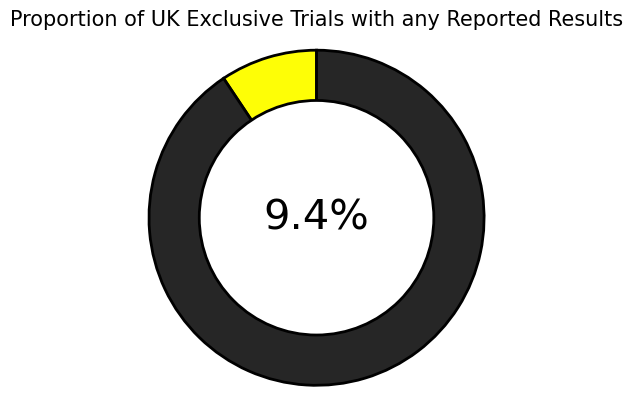

In [32]:
# Calculate the counts
count_results = uk_filtered['results'].sum()
count_no_results = len(uk_filtered) - count_results

# Calculate the proportions
total_trials = len(uk_filtered)
proportion_results = count_results / total_trials
proportion_no_results = count_no_results / total_trials

# Create the donut chart
labels = ['Results Reported', 'Results Not Reported']
sizes = [proportion_results, proportion_no_results]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

plt.pie(sizes, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of UK Exclusive Trials with any Reported Results', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Results Reported" in the middle of the donut chart
plt.text(0, 0, f'{proportion_results*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/donut_chart.png', dpi=300)

# Display the chart
plt.show()

## uk_results_2 and race_df

### Create a dataframe that includes the clinical trials that have released results and data on race/ethnicity.

In [33]:
# Merge the two dataframes based on nct_id column
merged_df = uk_results_2.merge(race_df, on='nct_id', how='left')

# Create the race_res_dum column
merged_df['race_res_dum'] = 0  # Initialize the column with 0
merged_df.loc[merged_df['category'].notna(), 'race_res_dum'] = 1  # Set 1 for rows with a match

In [34]:
merged_df.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,category,title,units,param_type,param_value,race_res_dum
0,NCT00125593,2003-06-30,Study of Heart and Renal Protection,Study of Heart and Renal Protection (SHARP): T...,Completed,Phase 4,9438.0,Actual,3.0,1,NaN,NaN,NaN,NaN,NaN,0
1,NCT00125853,2006-07-31,The Effect of Nebivolol on Insulin Sensitivity,A Trial to Compare the Effects of Nebivolol Ve...,Completed,Not Applicable,54.0,Actual,2.0,1,NaN,NaN,NaN,NaN,NaN,0
2,NCT00129987,2003-11-30,Trial of Lay-led Individualised Self-managemen...,A Multi-centre Randomised Trial of Lay-led Ind...,Completed,Not Applicable,567.0,Actual,2.0,1,American Indian or Alaska Native,Race (NIH/OMB),Participants,Count of Participants,0.0,1
3,NCT00129987,2003-11-30,Trial of Lay-led Individualised Self-managemen...,A Multi-centre Randomised Trial of Lay-led Ind...,Completed,Not Applicable,567.0,Actual,2.0,1,American Indian or Alaska Native,Race (NIH/OMB),Participants,Count of Participants,0.0,1
4,NCT00129987,2003-11-30,Trial of Lay-led Individualised Self-managemen...,A Multi-centre Randomised Trial of Lay-led Ind...,Completed,Not Applicable,567.0,Actual,2.0,1,American Indian or Alaska Native,Race (NIH/OMB),Participants,Count of Participants,0.0,1


In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6847 entries, 0 to 6846
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nct_id           6847 non-null   object 
 1   start_date       6847 non-null   object 
 2   brief_title      6847 non-null   object 
 3   official_title   6825 non-null   object 
 4   overall_status   6847 non-null   object 
 5   phase            6847 non-null   object 
 6   enrollment       6847 non-null   float64
 7   enrollment_type  6847 non-null   object 
 8   number_of_arms   6834 non-null   float64
 9   results          6847 non-null   int64  
 10  category         6267 non-null   object 
 11  title            6267 non-null   object 
 12  units            6267 non-null   object 
 13  param_type       6267 non-null   object 
 14  param_value      6267 non-null   object 
 15  race_res_dum     6847 non-null   int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 909.4+ KB


In [36]:
merged_df['nct_id'].nunique()

821

In [37]:
merged_df.to_csv('uk_trials_results_all.csv')

In [38]:
# to be used in the approved_drugs_uk notebook
merged_df1 = merged_df.dropna(subset=['category'])

By dropping nulls in the "category" column, we exclude the trials that did not report the type of race or ethnicity of participants included in the trials and hence cannot be later classified.

In [39]:
merged_df1['param_value'] = merged_df1['param_value'].astype(float)

/tmp/ipykernel_195/452228191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df1['param_value'] = merged_df1['param_value'].astype(float)


In [40]:
merged_df1['nct_id'].nunique()

241

From the 821 unique UK Exclusive clinical trials that released reults, **241** have released results on race/ethnicity.

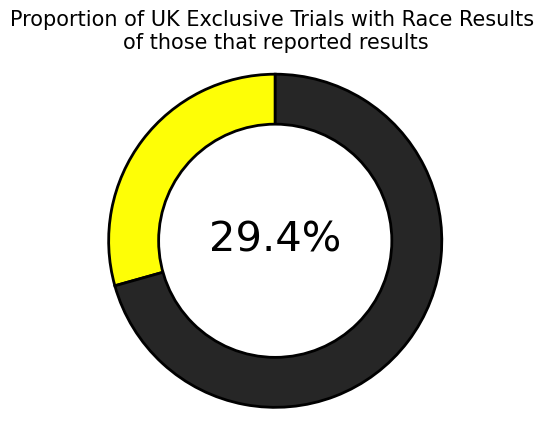

In [41]:
# Count unique nct_id values with race_res_dum
count_race_match = len(merged_df[merged_df['race_res_dum'] == 1]['nct_id'].unique())
count_no_race_match = len(merged_df[merged_df['race_res_dum'] == 0]['nct_id'].unique())

# Calculate the proportions
total_trials = len(merged_df['nct_id'].unique())
proportion_race_match = count_race_match / total_trials
proportion_no_race_match = count_no_race_match / total_trials

# Create the donut chart
labels = ['Race Match', 'No Race Match']
sizes = [proportion_race_match, proportion_no_race_match]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

# Highlight the "Race Match" section with a different color
colors_highlight = ['#fefe06', '#262626']

plt.pie(sizes, labels=None, colors=colors_highlight, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of UK Exclusive Trials with Race Results \nof those that reported results', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Race Match" outside the donut chart
plt.text(0, 0, f'{proportion_race_match*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/race_match_donut_chart.png', dpi=300)

# Display the chart
plt.show()


In [42]:
merged_df1.to_csv('merged.csv')

In [43]:
grouped_df = merged_df1.groupby(['nct_id', 'start_date', 'overall_status', 'phase', 'enrollment_type' , 'category', 'title', 'units', 'param_type']).sum()

/tmp/ipykernel_195/921626668.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = merged_df1.groupby(['nct_id', 'start_date', 'overall_status', 'phase', 'enrollment_type' , 'category', 'title', 'units', 'param_type']).sum()


In [44]:
grouped_df.to_csv('grouped_uk_only.csv')

In [45]:
grouped_df.reset_index(inplace=True)

In [46]:
grouped_df.nct_id.nunique()

241

In [47]:
grouped_df.category.nunique()

110

By reading the saved grouped.csv, we will have a better version to work with (no merged rows).
Also, using OpenAI API, I used the Chat GPT Google Docs extension and classified the "category" column into 6 different Race/Erhnicity groups (White, Black, Hispanic/ Latino, Asian, American Indian, Other/Multi) using the following prompt:

*=GPT_CLASSIFY(cell,"White/ White Heritage, Black/ Black Heritage, Hispanic/ Latino, Asian/ Asian Heritage, American Indian/ Alaska Native, Middle Eastern, Hawaiian/ Other Pacific Islander, Other, Mixed, Unknown or Not Reported")*


Some limitations:
- An input category called "other/mixed" was classified as "Other".
- there is a category called “unknown or not reported” and “missing” which is classified as “Unknown or Not collected” --> these are included in the ethnicity/race distributions of clinical trials reported results along with the other races that participated in the trial.

In [48]:
category_counts = grouped_df["category"].value_counts().reset_index()
category_counts.columns = ["category", "frequency"]

category_counts.to_csv("category_frequencies.csv", index=False)

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/AndreasPetrou/UCL_dissertation.github.io/main/UK%20Exclusive%20trials/grouped_race_uk_only.csv')

In [50]:
df.head()

,nct_id,start_date,overall_status,phase,enrollment_type,category,race/ethnicity,title,units,param_type,enrollment,number_of_arms,results,param_value,race_res_dum
0,NCT00129987,2003-11-30,Completed,Not Applicable,Actual,American Indian or Alaska Native,American Indian/ Alaska Native,Race (NIH/OMB),Participants,Count of Participants,1701,6,3,0,3
1,NCT00129987,2003-11-30,Completed,Not Applicable,Actual,Asian,Asian/ Asian Heritage,Race (NIH/OMB),Participants,Count of Participants,1701,6,3,182,3
2,NCT00129987,2003-11-30,Completed,Not Applicable,Actual,Black or African American,Black/ Black Heritage,Race (NIH/OMB),Participants,Count of Participants,1701,6,3,92,3
3,NCT00129987,2003-11-30,Completed,Not Applicable,Actual,More than one race,Mixed,Race (NIH/OMB),Participants,Count of Participants,1701,6,3,28,3
4,NCT00129987,2003-11-30,Completed,Not Applicable,Actual,Native Hawaiian or Other Pacific Islander,Hawaiian/ Other Pacific Islander,Race (NIH/OMB),Participants,Count of Participants,1701,6,3,0,3


In [51]:
df.drop(['category','title','units','param_type'], axis =1 , inplace=True)

In [52]:
# pivot the dataframe to create new columns for each category of the 'race' column
pivoted_df = df.pivot_table(index=['nct_id', 'phase', 'start_date','enrollment_type'], columns='race/ethnicity', values=['param_value'], aggfunc='sum').reset_index()

In [53]:
pivoted_df.head()

nct_id           phase  start_date enrollment_type  \
race/ethnicity                                                            
0               NCT00129987  Not Applicable  2003-11-30          Actual   
1               NCT00135226         Phase 4  2005-03-31          Actual   
2               NCT00508196  Not Applicable  2006-11-30          Actual   
3               NCT00509925         Phase 4  2007-07-31          Actual   
4               NCT00534703         Phase 2  2014-07-31          Actual   

                                  param_value                        \
race/ethnicity American Indian/ Alaska Native Asian/ Asian Heritage   
0                                         0.0                 182.0   
1                                         NaN                   NaN   
2                                         0.0                   0.0   
3                                         0.0                   0.0   
4                                         NaN                   NaN   

                                                                       \
race/ethnicity Black/ Black Heritage Hawaiian/ Other Pacific Islander   
0                               92.0                              0.0   
1                              280.0                              NaN   
2                                0.0                              0.0   
3                                0.0                              0.0   
4                                2.0                              NaN   

                                                            \
race/ethnicity Hispanic/ Latino Middle Eastern Mixed Other   
0                           NaN            NaN  28.0   NaN   
1                           NaN          368.0   NaN   NaN   
2                           NaN            NaN   0.0   NaN   
3                           NaN            NaN   0.0   NaN   
4                           NaN            NaN   NaN   NaN   

                                                              
race/ethnicity Unknown or Not Reported White/ White Heritage  
0                                 24.0                 808.0  
1                                442.0               29870.0  
2                                  0.0                  22.0  
3                                  0.0                  23.0  
4                                  NaN                   8.0

In [54]:
pivoted_df.to_csv('grouped_race_trial_2_uk_only.csv')

I will manually now in excel rename the columns, because now i have 2 rows being the column names.

In [55]:
df_race = pd.read_csv('https://raw.githubusercontent.com/AndreasPetrou/UCL_dissertation.github.io/main/UK%20Exclusive%20trials/race_columns_uk_only.csv')

In [56]:
df_race.head()

,nct_id,phase,start_date,enrollment_type,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage
0,NCT00129987,Not Applicable,30/11/2003,Actual,0.0,182.0,92.0,0.0,NaN,NaN,28.0,NaN,24.0,808.0
1,NCT00135226,Phase 4,31/03/2005,Actual,NaN,NaN,280.0,NaN,NaN,368.0,NaN,NaN,442.0,29870.0
2,NCT00508196,Not Applicable,30/11/2006,Actual,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,22.0
3,NCT00509925,Phase 4,31/07/2007,Actual,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,23.0
4,NCT00534703,Phase 2,31/07/2014,Actual,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0


In [57]:
# create a new column 'uk_races_dum' based on race columns
df_race['uk_races_dum'] = df_race[['Asian/ Asian Heritage','Black/ Black Heritage','Mixed','Other','White/ White Heritage']].apply(lambda x: int(x.notnull().all()), axis=1)

In [58]:
df_race['count'] = 1

In [59]:
df_race.nct_id.nunique()

241

In [60]:
df_race.to_csv('df_race.csv')

### Dataframe of Race/Ethnicity and Phase of trial

In [61]:
df_race_phase = df_race.groupby(['phase']).sum()

/tmp/ipykernel_195/2294493066.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_race_phase = df_race.groupby(['phase']).sum()


In [62]:
df_race_phase.reset_index(inplace=True)

In [63]:
df_race_phase

,phase,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count
0,Early Phase 1,0.0,12.0,16.0,0.0,2.0,0.0,6.0,0.0,1.0,441.0,0,3
1,Not Applicable,4.0,536.0,297.0,19.0,9.0,4.0,161.0,131.0,250.0,8693.0,1,51
2,Phase 1,2.0,316.0,450.0,8.0,48.0,8.0,136.0,14.0,38.0,8926.0,0,106
3,Phase 1/Phase 2,0.0,16.0,2.0,0.0,0.0,0.0,0.0,14.0,53.0,455.0,0,10
4,Phase 2,0.0,93.0,134.0,4.0,22.0,2.0,49.0,6.0,83.0,4504.0,1,40
5,Phase 2/Phase 3,0.0,178.0,112.0,0.0,0.0,0.0,0.0,44.0,2.0,2338.0,0,3
6,Phase 3,2.0,17814.0,704.0,4.0,492.0,0.0,100.0,192.0,50294.0,57274.0,1,9
7,Phase 4,0.0,182.0,407.0,0.0,10.0,368.0,10.0,11.0,480.0,32313.0,0,19


### Dataframe of Race/Ethnicity and unique Clinical Trial IDs

In [64]:
df_race_trials = df_race.groupby(['nct_id','start_date']).sum()

/tmp/ipykernel_195/3658413480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_race_trials = df_race.groupby(['nct_id','start_date']).sum()


In [65]:
df_race_trials = df_race_trials.reset_index()

In [66]:
df_race_trials['start_date'] = pd.to_datetime(df_race_trials['start_date'])

/tmp/ipykernel_195/2348154908.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_race_trials['start_date'] = pd.to_datetime(df_race_trials['start_date'])


In [67]:
# extract the year from the datetime column
df_race_trials['year'] = df_race_trials['start_date'].dt.year

In [68]:
df_race_trials.head()

,nct_id,start_date,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count,year
0,NCT00129987,2003-11-30,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0,1,2003
1,NCT00135226,2005-03-31,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0,1,2005
2,NCT00508196,2006-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,1,2006
3,NCT00509925,2007-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,1,2007
4,NCT00534703,2014-07-31,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0,1,2014


### Dataframe of Race/Ethnicity and Time

In [69]:
df_race['start_date'] = pd.to_datetime(df_race['start_date'])

/tmp/ipykernel_195/2249627174.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_race['start_date'] = pd.to_datetime(df_race['start_date'])


In [70]:
# extract the year from the datetime column
df_race['year'] = df_race['start_date'].dt.year

In [71]:
df_race_time = df_race.groupby(['year']).sum()

/tmp/ipykernel_195/1026857617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_race_time = df_race.groupby(['year']).sum()


In [72]:
df_race_time = df_race_time.reset_index()

In [73]:
df_race_time.head()

,year,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count
0,2003,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0,1
1,2005,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0,1
2,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,1
3,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,1
4,2008,0.0,28.0,28.0,0.0,0.0,0.0,0.0,0.0,8.0,538.0,0,4


Our final dataframes:
- **df_race_phase**
    - includes the number of participants for each race/ethnicity by each phase of clinical trials
- **df_race_trials**
    - includes the number of participants for each race/ethnicity for each unique clinical trial nct_id
- **df_race_time**
    - includes the number of participants for each race/ethnicity by year

# Visualising the data

Let's first explore the number of new trials with results and the percent of trials reporting any race/ethnicity results by year.

In [74]:
merged_df.nct_id.nunique()

821

We will work with the above dataframe, since it is the one which includes all the unique clinical trials in the UK that have released results (of any kind).

In [75]:
trial_results = merged_df.copy()

In [76]:
trial_results['start_date'] = pd.to_datetime(trial_results['start_date'])

In [77]:
trial_results = trial_results.groupby(['nct_id','start_date']).sum()

/tmp/ipykernel_195/789453541.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trial_results = trial_results.groupby(['nct_id','start_date']).sum()


In [78]:
trial_results = trial_results.reset_index()

In [79]:
# extract the year from the datetime column
trial_results['year'] = trial_results['start_date'].dt.year

In [80]:
trial_results['nct_id'].nunique()

821

In [81]:
trial_results.head()

,nct_id,start_date,enrollment,number_of_arms,results,race_res_dum,year
0,NCT00125593,2003-06-30,9438.0,3.0,1,0,2003
1,NCT00125853,2006-07-31,54.0,2.0,1,0,2006
2,NCT00129987,2003-11-30,11907.0,42.0,21,21,2003
3,NCT00135226,2005-03-31,309600.0,80.0,20,20,2005
4,NCT00143507,2004-12-31,10917.0,2.0,1,0,2004


In [82]:
trial_results.drop(['enrollment','number_of_arms','results'], axis=1, inplace=True)

In [83]:
trial_results.head()

,nct_id,start_date,race_res_dum,year
0,NCT00125593,2003-06-30,0,2003
1,NCT00125853,2006-07-31,0,2006
2,NCT00129987,2003-11-30,21,2003
3,NCT00135226,2005-03-31,20,2005
4,NCT00143507,2004-12-31,0,2004


In [84]:
trial_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   nct_id        821 non-null    object        
 1   start_date    821 non-null    datetime64[ns]
 2   race_res_dum  821 non-null    int64         
 3   year          821 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 25.8+ KB


In [85]:
trial_results.nct_id.nunique()

821

We got 821 non-null values for nct_id, which means that we have a row for each unique clinical trial.

In [86]:
df_race_trials.head()

,nct_id,start_date,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count,year
0,NCT00129987,2003-11-30,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0,1,2003
1,NCT00135226,2005-03-31,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0,1,2005
2,NCT00508196,2006-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,1,2006
3,NCT00509925,2007-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,1,2007
4,NCT00534703,2014-07-31,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0,1,2014


The above dataframe includes all the clinical trials that released race/ethnicity results.

In [87]:
trial_results_race = pd.merge(trial_results, df_race_trials, on='nct_id', how='outer')

In [88]:
trial_results_race.head()

,nct_id,start_date_x,race_res_dum,year_x,start_date_y,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count,year_y
0,NCT00125593,2003-06-30,0,2003,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCT00125853,2006-07-31,0,2006,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NCT00129987,2003-11-30,21,2003,2003-11-30,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0.0,1.0,2003.0
3,NCT00135226,2005-03-31,20,2005,2005-03-31,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0.0,1.0,2005.0
4,NCT00143507,2004-12-31,0,2004,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# rename the 'year_y' column to 'race_dum' and convert nulls to 0 and non-nulls to 1
trial_results_race.rename(columns={'year_y': 'race_dum'}, inplace=True)
trial_results_race['race_dum'] = trial_results_race['race_dum'].notnull().astype(int)

In [90]:
trial_results_race.drop(['count'], axis=1, inplace=True)

In [91]:
trial_results_race['number of new trials with results'] = 1

In [92]:
trial_results_race

,nct_id,start_date_x,race_res_dum,year_x,start_date_y,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results
0,NCT00125593,2003-06-30,0,2003,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,NCT00125853,2006-07-31,0,2006,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,NCT00129987,2003-11-30,21,2003,2003-11-30,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0.0,1,1
3,NCT00135226,2005-03-31,20,2005,2005-03-31,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0.0,1,1
4,NCT00143507,2004-12-31,0,2004,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,NCT04680273,2021-01-07,50,2021,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,1,1
817,NCT04796831,2021-04-26,7,2021,2021-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1,1
818,NCT05288673,2015-07-28,0,2015,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
819,NCT05288829,2016-08-19,12,2016,2016-08-19,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,80.0,0.0,1,1


In [93]:
trial_results_race_year = trial_results_race.groupby(['year_x']).sum().reset_index()

/tmp/ipykernel_195/3648735719.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trial_results_race_year = trial_results_race.groupby(['year_x']).sum().reset_index()


In [94]:
trial_results_race_year.rename(columns={'year_x': 'year'}, inplace=True)

In [95]:
trial_results_race_year.head()

,year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results
0,2002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10
1,2003,21,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0.0,1,4
2,2004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8
3,2005,20,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0.0,1,15
4,2006,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,1,27


In [96]:
# Convert "year" column to integers
trial_results_race_year['year'] = trial_results_race_year['year'].astype(int)

In [97]:
def calculate_percent_reporting_race(df):
    df['percent of trials reporting any race/ethnicity data'] = round((df['race_dum'] / df['number of new trials with results']) * 100, 2)
    return df

def calculate_percent_reporting_all(df):
    df['percent of trials reporting any race/ethnicity data'] = round((df['race_dum'] / df['number of new trials with results']) * 100, 2)
    df['percent of trials reporting All UK Race Groups'] = round((df['uk_races_dum'] / df['race_dum']) * 100, 2)
    return df

In [98]:
calculate_percent_reporting_race(trial_results_race_year)
calculate_percent_reporting_all(trial_results_race_year)

,year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results,percent of trials reporting any race/ethnicity data,percent of trials reporting All UK Race Groups
0,2002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0.00,NaN
1,2003,21,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0.0,1,4,25.00,0.00
2,2004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0.00,NaN
3,2005,20,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0.0,1,15,6.67,0.00
4,2006,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,1,27,3.70,0.00
5,2007,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,1,24,4.17,0.00
6,2008,91,0.0,28.0,28.0,0.0,0.0,0.0,0.0,0.0,8.0,538.0,0.0,4,35,11.43,0.00
7,2009,206,0.0,8.0,25.0,0.0,0.0,0.0,7.0,0.0,0.0,1058.0,0.0,7,42,16.67,0.00
8,2010,166,0.0,173.0,141.0,0.0,4.0,0.0,0.0,44.0,90.0,2536.0,0.0,9,47,19.15,0.00
9,2011,87,0.0,17742.0,662.0,0.0,470.0,0.0,66.0,300.0,50268.0,54596.0,1.0,7,48,14.58,14.29


In [99]:
trial_results_race_year.head()

,year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results,percent of trials reporting any race/ethnicity data,percent of trials reporting All UK Race Groups
0,2002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0.00,NaN
1,2003,21,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0.0,1,4,25.00,0.0
2,2004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0.00,NaN
3,2005,20,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0.0,1,15,6.67,0.0
4,2006,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,1,27,3.70,0.0


In [100]:
table_1 = trial_results_race_year.iloc[:,[0,14,15,16]]

In [101]:
table_1

,year,number of new trials with results,percent of trials reporting any race/ethnicity data,percent of trials reporting All UK Race Groups
0,2002,10,0.00,NaN
1,2003,4,25.00,0.00
2,2004,8,0.00,NaN
3,2005,15,6.67,0.00
4,2006,27,3.70,0.00
5,2007,24,4.17,0.00
6,2008,35,11.43,0.00
7,2009,42,16.67,0.00
8,2010,47,19.15,0.00
9,2011,48,14.58,14.29


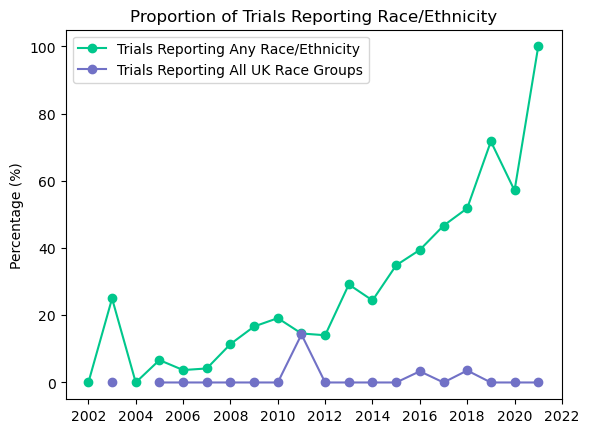

In [102]:
# Filter the data until 2021
table_1_filtered = table_1[table_1['year'] <= 2021]

# Plot the line graphs
plt.plot(table_1_filtered['year'], table_1_filtered['percent of trials reporting any race/ethnicity data'], marker='o', color='#00C78C', label='Trials Reporting Any Race/Ethnicity')
plt.plot(table_1_filtered['year'], table_1_filtered['percent of trials reporting All UK Race Groups'], marker='o', color='#7171C6', label='Trials Reporting All UK Race Groups')

# Set the labels and title
plt.ylabel('Percentage (%)')
plt.title('Proportion of Trials Reporting Race/Ethnicity')

# Set the x-axis tick positions and labels
plt.xticks(range(table_1_filtered['year'].min(), table_1_filtered['year'].max()+2, 2))

# Add a legend
plt.legend()

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/reporting_line_graph.png', dpi=300)

# Display the plot
plt.show()

In [103]:
trial_results_race_mmyy = trial_results_race.copy()

In [104]:
trial_results_race_mmyy.sort_values(by='start_date_x')

,nct_id,start_date_x,race_res_dum,year_x,start_date_y,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results
66,NCT00674609,2002-02-28,0,2002,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
273,NCT01606137,2002-02-28,0,2002,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
274,NCT01606176,2002-03-31,0,2002,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
272,NCT01604265,2002-03-31,0,2002,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
67,NCT00675948,2002-04-30,0,2002,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,NCT04604795,2020-11-04,66,2020,2020-04-11,0.0,14.0,16.0,0.0,0.0,0.0,2.0,0.0,0.0,98.0,0.0,1,1
815,NCT04671017,2020-12-16,0,2020,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
816,NCT04680273,2021-01-07,50,2021,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,1,1
817,NCT04796831,2021-04-26,7,2021,2021-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1,1


In [105]:
# Extract and combine month and year into a single column
trial_results_race_mmyy['month_year'] = trial_results_race_mmyy['start_date_x'].dt.strftime('%B %Y')

In [106]:
trial_results_race_mmyy.head()

,nct_id,start_date_x,race_res_dum,year_x,start_date_y,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results,month_year
0,NCT00125593,2003-06-30,0,2003,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,June 2003
1,NCT00125853,2006-07-31,0,2006,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,July 2006
2,NCT00129987,2003-11-30,21,2003,2003-11-30,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0.0,1,1,November 2003
3,NCT00135226,2005-03-31,20,2005,2005-03-31,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0.0,1,1,March 2005
4,NCT00143507,2004-12-31,0,2004,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,December 2004


In [107]:
trial_results_race_mmyy.drop(['start_date_x','year_x','start_date_y'], axis=1, inplace=True)

In [108]:
trial_results_race_mmyy = trial_results_race_mmyy.groupby(['month_year']).sum()

/tmp/ipykernel_195/2200017311.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trial_results_race_mmyy = trial_results_race_mmyy.groupby(['month_year']).sum()


In [109]:
trial_results_race_mmyy = trial_results_race_mmyy.reset_index()

In [110]:
trial_results_race_mmyy.head()

,month_year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results
0,April 2002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,April 2004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,April 2005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,April 2006,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,April 2008,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [111]:
calculate_percent_reporting_race(trial_results_race_mmyy)
calculate_percent_reporting_all(trial_results_race_mmyy)

,month_year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results,percent of trials reporting any race/ethnicity data,percent of trials reporting All UK Race Groups
0,April 2002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.00,NaN
1,April 2004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.00,NaN
2,April 2005,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.00,NaN
3,April 2006,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.00,NaN
4,April 2008,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,September 2016,14,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,5,20.00,0.0
199,September 2017,28,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,8.0,54.0,0.0,2,8,25.00,0.0
200,September 2018,75,0.0,2.0,4.0,2.0,2.0,4.0,4.0,0.0,10.0,318.0,0.0,3,5,60.00,0.0
201,September 2019,39,0.0,21.0,18.0,0.0,0.0,1.0,0.0,0.0,0.0,149.0,0.0,2,3,66.67,0.0


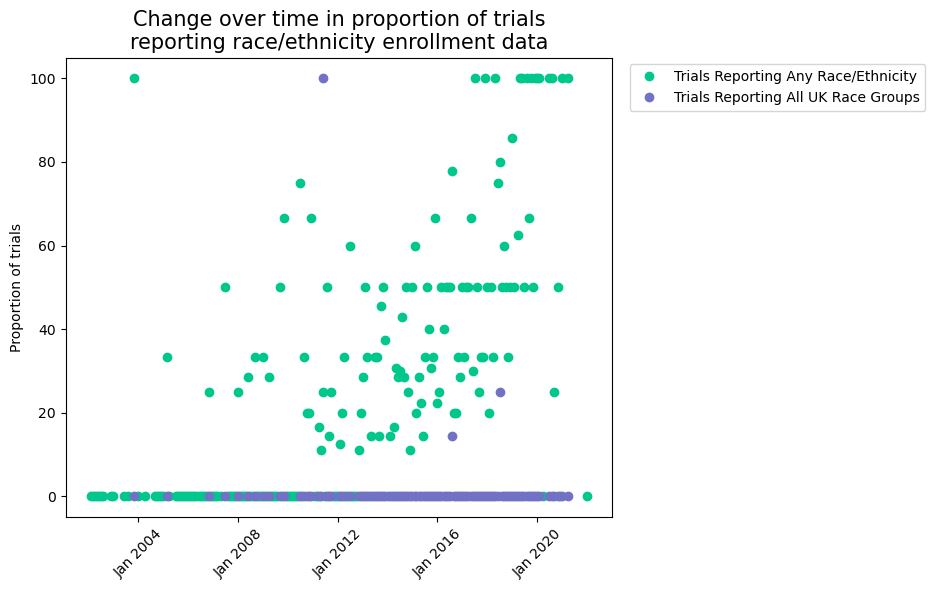

In [112]:
# Convert 'month_year' column to datetime format
trial_results_race_mmyy['month_year'] = pd.to_datetime(trial_results_race_mmyy['month_year'], format='%B %Y')

# Set the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the dot diagrams
ax.plot(trial_results_race_mmyy['month_year'], trial_results_race_mmyy['percent of trials reporting any race/ethnicity data'], 'o', color='#00C78C', label='Trials Reporting Any Race/Ethnicity')
ax.plot(trial_results_race_mmyy['month_year'], trial_results_race_mmyy['percent of trials reporting All UK Race Groups'], 'o', color='#7171C6', label='Trials Reporting All UK Race Groups')

# Set the labels and title
# ax.set_xlabel('Month and Year')
ax.set_ylabel('Proportion of trials')

# Add a two-line title
title_line1 = 'Change over time in proportion of trials'
title_line2 = 'reporting race/ethnicity enrollment data'
ax.set_title(f'{title_line1}\n{title_line2}', fontsize=15)

# Add a legend
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Format x-axis ticks to display month and year
date_format = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1])  

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/scatter_graphs_reporting.png', dpi=300)

# Display the plot
plt.show()

## Plotting race/ethnicity participation over time by race/ethnicity

In [113]:
df_dummies =  trial_results_race.copy()

# Create dummy variables for race columns
race_columns = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed','Unknown or Not Reported']

# Convert zeros to null for race columns
df_dummies[race_columns] = df_dummies[race_columns].replace(0, np.nan)

# Convert null values to 0 and non-null values to 1 for race columns
df_dummies[race_columns] = df_dummies[race_columns].notnull().astype(int).fillna(0)

df_dummies

,nct_id,start_date_x,race_res_dum,year_x,start_date_y,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results
0,NCT00125593,2003-06-30,0,2003,NaT,0,0,0,0,0,0,0,0,0,0,NaN,0,1
1,NCT00125853,2006-07-31,0,2006,NaT,0,0,0,0,0,0,0,0,0,0,NaN,0,1
2,NCT00129987,2003-11-30,21,2003,2003-11-30,0,1,1,0,0,0,1,0,1,1,0.0,1,1
3,NCT00135226,2005-03-31,20,2005,2005-03-31,0,0,1,0,0,1,0,0,1,1,0.0,1,1
4,NCT00143507,2004-12-31,0,2004,NaT,0,0,0,0,0,0,0,0,0,0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,NCT04680273,2021-01-07,50,2021,2021-07-01,0,0,0,0,0,0,0,0,0,1,0.0,1,1
817,NCT04796831,2021-04-26,7,2021,2021-04-26,0,0,0,0,0,0,0,0,0,1,0.0,1,1
818,NCT05288673,2015-07-28,0,2015,NaT,0,0,0,0,0,0,0,0,0,0,NaN,0,1
819,NCT05288829,2016-08-19,12,2016,2016-08-19,0,0,0,0,1,0,0,0,0,1,0.0,1,1


In [114]:
df_dummies['month_year'] = df_dummies['start_date_x'].dt.strftime('%B %Y')
df_dummies = df_dummies.groupby(['month_year']).sum()
df_dummies.reset_index()

/tmp/ipykernel_195/1909728300.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dummies = df_dummies.groupby(['month_year']).sum()


,month_year,race_res_dum,year_x,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results
0,April 2002,0,2002,0,0,0,0,0,0,0,0,0,0,0.0,0,1
1,April 2004,0,2004,0,0,0,0,0,0,0,0,0,0,0.0,0,1
2,April 2005,0,2005,0,0,0,0,0,0,0,0,0,0,0.0,0,1
3,April 2006,0,2006,0,0,0,0,0,0,0,0,0,0,0.0,0,1
4,April 2008,0,2008,0,0,0,0,0,0,0,0,0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,September 2016,14,10080,0,0,1,0,0,0,0,0,0,1,0.0,1,5
199,September 2017,28,16136,0,0,1,0,0,0,0,0,1,2,0.0,2,8
200,September 2018,75,10090,0,1,2,1,1,1,2,0,2,3,0.0,3,5
201,September 2019,39,6057,0,2,1,0,0,1,0,0,0,2,0.0,2,3


In [115]:
# Calculate the proportion of trials reporting each ethnicity over time
ethnicity_columns = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']
for race in ethnicity_columns:
    df_dummies[race + '_ratio'] = round((df_dummies[race] / df_dummies['number of new trials with results'])*100,2)

In [116]:
df_dummies.drop(['year_x'], axis=1,inplace=True)

In [117]:
df_dummies.sort_values(by='month_year')

,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,...,number of new trials with results,White/ White Heritage_ratio,Black/ Black Heritage_ratio,Hispanic/ Latino_ratio,Asian/ Asian Heritage_ratio,American Indian/ Alaska Native_ratio,Middle Eastern_ratio,Hawaiian/ Other Pacific Islander_ratio,Other_ratio,Mixed_ratio
month_year,,,,,,,,,,,,,,,,,,,,,
April 2002,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
April 2004,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
April 2005,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
April 2006,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
April 2008,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
September 2016,14,0,0,1,0,0,0,0,0,0,...,5,20.00,20.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
September 2017,28,0,0,1,0,0,0,0,0,1,...,8,25.00,12.50,0.0,0.00,0.0,0.00,0.0,0.0,0.0
September 2018,75,0,1,2,1,1,1,2,0,2,...,5,60.00,40.00,20.0,20.00,0.0,20.00,20.0,0.0,40.0


In [118]:
df_dummies.reset_index(inplace=True)

In [119]:
# Convert 'month_year' column to datetime object
df_dummies['month_year'] = pd.to_datetime(df_dummies['month_year'])

# Sort the DataFrame by 'month_year'
df_dummies = df_dummies.sort_values('month_year')

In [120]:
df_dummies

,month_year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,...,number of new trials with results,White/ White Heritage_ratio,Black/ Black Heritage_ratio,Hispanic/ Latino_ratio,Asian/ Asian Heritage_ratio,American Indian/ Alaska Native_ratio,Middle Eastern_ratio,Hawaiian/ Other Pacific Islander_ratio,Other_ratio,Mixed_ratio
54,2002-02-01,0,0,0,0,0,0,0,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,2002-03-01,0,0,0,0,0,0,0,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2002-04-01,0,0,0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137,2002-05-01,0,0,0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,2002-06-01,0,0,0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,2020-11-01,66,0,1,1,0,0,0,1,0,...,2,50.0,50.0,0.0,50.0,0.0,0.0,0.0,0.0,50.0
53,2020-12-01,0,0,0,0,0,0,0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,2021-01-01,50,0,0,0,0,0,0,0,0,...,1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2021-04-01,7,0,0,0,0,0,0,0,0,...,1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


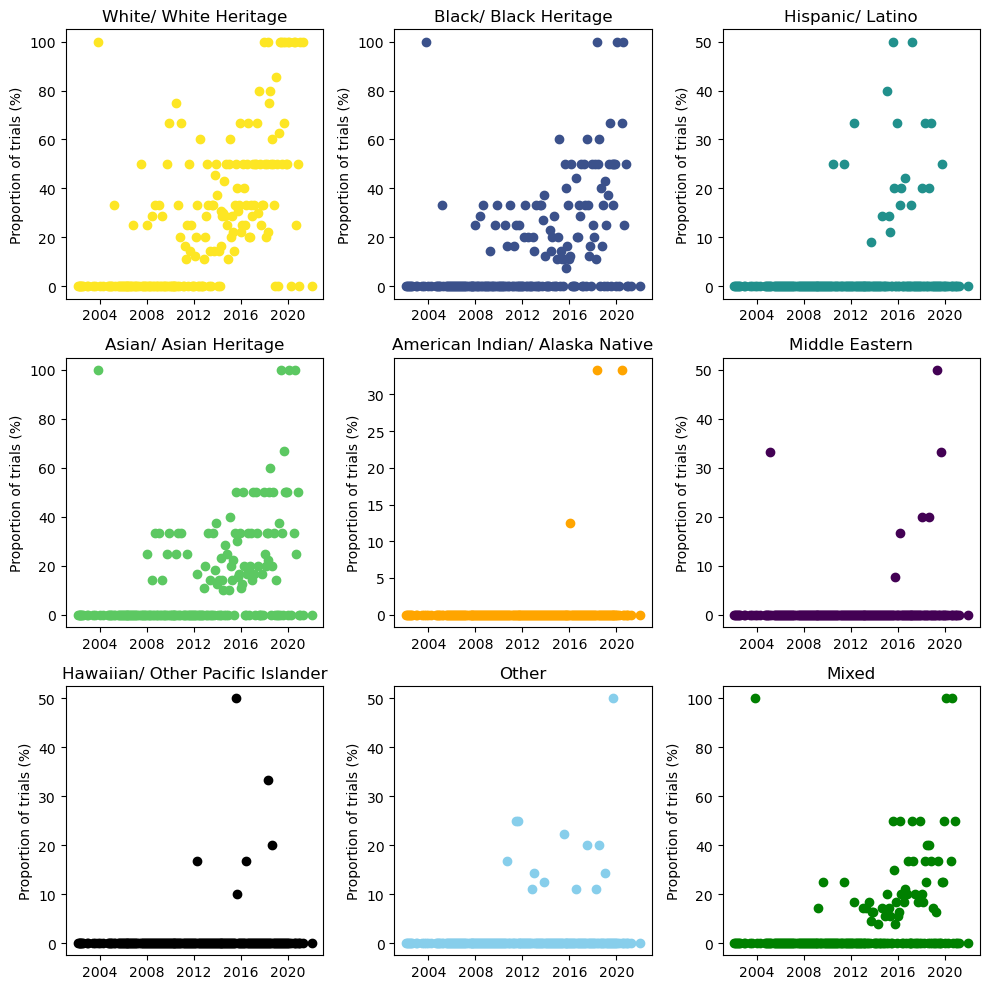

In [121]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.flatten()

# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

race_columns = ['White/ White Heritage_ratio','Black/ Black Heritage_ratio','Hispanic/ Latino_ratio','Asian/ Asian Heritage_ratio','American Indian/ Alaska Native_ratio','Middle Eastern_ratio','Hawaiian/ Other Pacific Islander_ratio','Other_ratio','Mixed_ratio']
race_names = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

for i, race in enumerate(race_columns):
    ax = axes[i]
    ax.scatter(df_dummies['month_year'], df_dummies[race], color=colors[i], marker='o')
    ax.set_ylabel('Proportion of trials (%)')
    ax.set_title(race_names[i])

plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/race_proportion_scatter.png', dpi=300)

plt.show()

## Area chart of trilas with results on ethnicity

In [122]:
trial_results_race_year.head()

,year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results,percent of trials reporting any race/ethnicity data,percent of trials reporting All UK Race Groups
0,2002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0.00,NaN
1,2003,21,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0.0,1,4,25.00,0.0
2,2004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0.00,NaN
3,2005,20,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0.0,1,15,6.67,0.0
4,2006,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,1,27,3.70,0.0


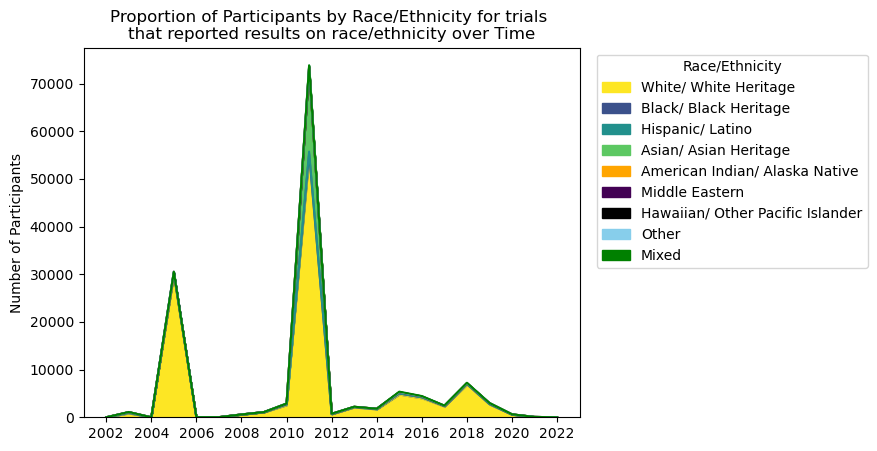

In [123]:
# Selecting the relevant columns for the area chart
columns = ['year', 'White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Creating a new dataframe with the selected columns
race_data = trial_results_race_year[columns]

# Setting the 'year' column as the index
race_data.set_index('year', inplace=True)

# Define the colors for each race/ethnicity
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

# Plotting the area chart with custom colors
race_data.plot.area(stacked=True, color=colors)

# Customizing the plot
plt.title('Proportion of Participants by Race/Ethnicity for trials \nthat reported results on race/ethnicity over Time')
plt.xlabel('')
plt.ylabel('Number of Participants')
plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.02, 1), loc='upper left')

# Changing x-axis labels
plt.xticks(range(2002, 2023, 2))

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/race_area_chart.png', dpi=300)

# Displaying the chart
plt.show()

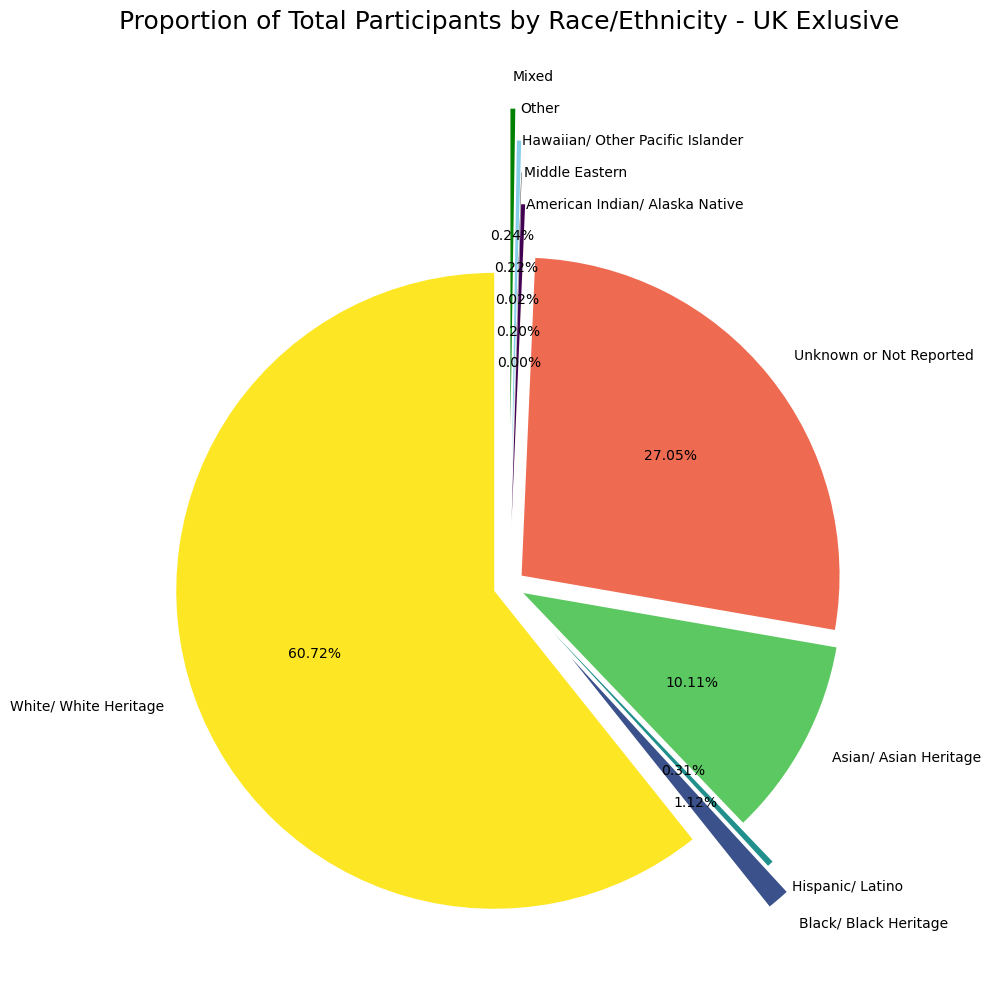

In [124]:
# Calculate the total number of participants by race/ethnicity
total_participants = trial_results_race[['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage','Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']].sum()

# Define the colors for each race/ethnicity
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', '#EE6A50','orange', '#430154', 'black', 'skyblue', 'green']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Set explode values to break the pie chart
explode = (0.05, 0.3, 0.2, 0.05, 0.05, 0.1, 0.2, 0.3, 0.4,0.5)

# Plot the pie chart
ax.pie(total_participants, labels=total_participants.index, autopct='%1.2f%%', startangle=90, colors=colors, textprops={'color': 'black'}, explode=explode)

# Set the title
ax.set_title('Proportion of Total Participants by Race/Ethnicity - UK Exlusive', y=1.19, fontsize=18)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_aspect('equal')

# Adjust padding around the figure
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/participants_pie_chart.png', dpi=300)

# Display the plot
plt.show()


In [127]:
# Calculate the total number of participants by race/ethnicity
total_participants = trial_results_race[['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage', 'Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']].sum()

# Define the colors for each race/ethnicity
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', '#EE6A50', 'orange', '#430154', 'black', 'skyblue', 'green']

# Create a Pie chart figure
fig = go.Figure(data=[go.Pie(
    labels=total_participants.index,
    values=total_participants,
    textinfo='label+percent',
    hovertemplate='%{label}<br>%{value}<br>%{percent:.1%}',
    marker=dict(colors=colors),
)])

# Set the title
fig.update_layout(
    title='Proportion of Total Participants by Race/Ethnicity',
    title_font_size=18,
)

# Show the interactive chart
fig.show()

## Connected Dot graph

In [128]:
trial_results_race_year.head()

,year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results,percent of trials reporting any race/ethnicity data,percent of trials reporting All UK Race Groups
0,2002,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,10,0.00,NaN
1,2003,21,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0.0,1,4,25.00,0.0
2,2004,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8,0.00,NaN
3,2005,20,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0.0,1,15,6.67,0.0
4,2006,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,1,27,3.70,0.0


In [129]:
# Selecting the years 2017-2021 (2022 has 0)
# Filtering the dataframe for the years 2017-2021
selected_years = trial_results_race_year.loc[(trial_results_race_year['year'] >= 2017) & (trial_results_race_year['year'] <= 2021)]

In [130]:
# Specify the columns to sum
columns_to_sum = ['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage', 'Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']

# Create a new column for total participants per year
selected_years['Total Participants'] = selected_years[columns_to_sum].sum(axis=1)

/tmp/ipykernel_195/3583478520.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
selected_years

,year,race_res_dum,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results,percent of trials reporting any race/ethnicity data,percent of trials reporting All UK Race Groups,Total Participants
15,2017,681,0.0,56.0,99.0,0.0,5.0,0.0,35.0,16.0,42.0,2249.0,0.0,28,60,46.67,0.00,2502.0
16,2018,845,2.0,149.0,143.0,6.0,28.0,8.0,73.0,8.0,104.0,6826.0,1.0,28,54,51.85,3.57,7347.0
17,2019,867,0.0,195.0,93.0,0.0,2.0,2.0,24.0,13.0,22.0,2676.0,0.0,33,46,71.74,0.00,3027.0
18,2020,297,2.0,43.0,39.0,0.0,0.0,0.0,20.0,0.0,6.0,525.0,0.0,8,14,57.14,0.00,635.0
19,2021,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,2,2,100.00,0.00,72.0


In [132]:
# Calculate the mean of each column
mean_values = selected_years.mean()

In [133]:
# Create a new dataframe for mean values
mean_df = pd.DataFrame(mean_values, columns=['Mean'])
mean_df

,Mean
year,2019.000
race_res_dum,549.400
American Indian/ Alaska Native,0.800
Asian/ Asian Heritage,88.600
Black/ Black Heritage,74.800
Hawaiian/ Other Pacific Islander,1.200
Hispanic/ Latino,7.000
Middle Eastern,2.000
Mixed,30.400
Other,7.400


In [134]:
# Selecting the desired columns
columns_to_select = ['White/ White Heritage', 'Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage', 'Unknown or Not Reported', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed','Total Participants']
selected_rows = mean_df.loc[columns_to_select]

In [135]:
# Calculate the percentage of each category
selected_rows['% of trial'] = round((selected_rows['Mean'] / selected_rows.loc['Total Participants', 'Mean']) * 100,2)

In [136]:
selected_rows

,Mean,% of trial
White/ White Heritage,2469.6,90.91
Black/ Black Heritage,74.8,2.75
Hispanic/ Latino,7.0,0.26
Asian/ Asian Heritage,88.6,3.26
Unknown or Not Reported,34.8,1.28
American Indian/ Alaska Native,0.8,0.03
Middle Eastern,2.0,0.07
Hawaiian/ Other Pacific Islander,1.2,0.04
Other,7.4,0.27
Mixed,30.4,1.12


In [137]:
selected_rows_2 = selected_rows.copy()

In the UK 2021 Census only the following race/ethnicities have been used
- White
- Black
- Asian
- Mixed
- Other
    - The "Other" category includes "Arab" and "Other ethnic groups". Therefore, i will subtract the Arab group from other and match it with the Middle Easter group i have. I will sum up American Indian/ Alaska Native, Hispanic/ Latino, Hawaiian/ Other Pacific Islander and Other together to form the Other group.

This can be achieved because i found a broken down list of all the subgroups of race/ethnicities used in the 2021 Census.

In [138]:
# Rows to be summed up
rows_to_sum = ['Hispanic/ Latino', 'American Indian/ Alaska Native', 'Hawaiian/ Other Pacific Islander', 'Other']

# Calculate the sum of the selected rows
other_sum = selected_rows.loc[rows_to_sum].sum()

# Create the 'Other' row
other_row = pd.DataFrame(other_sum).transpose()

# Append the 'Other' row to the DataFrame
selected_rows = selected_rows.append(other_row)

# Drop the rows that were summed up
selected_rows = selected_rows.drop(rows_to_sum)

other_row.index = ['Other']

/tmp/ipykernel_195/3462180342.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [139]:
# Rename the row with index 0 to 'Other'
selected_rows = selected_rows.rename(index={0: 'Other'})
selected_rows

,Mean,% of trial
White/ White Heritage,2469.6,90.91
Black/ Black Heritage,74.8,2.75
Asian/ Asian Heritage,88.6,3.26
Unknown or Not Reported,34.8,1.28
Middle Eastern,2.0,0.07
Mixed,30.4,1.12
Total Participants,2716.6,100.00
Other,16.4,0.60


In [140]:
# Define a list of the desired rows to keep
desired_rows = ['White/ White Heritage', 'Black/ Black Heritage', 'Asian/ Asian Heritage', 'Other', 'Mixed', 'Middle Eastern']

# Filter the dataframe based on the desired rows
filtered_rows = selected_rows[selected_rows.index.isin(desired_rows)]
filtered_rows

,Mean,% of trial
White/ White Heritage,2469.6,90.91
Black/ Black Heritage,74.8,2.75
Asian/ Asian Heritage,88.6,3.26
Middle Eastern,2.0,0.07
Mixed,30.4,1.12
Other,16.4,0.60


In [141]:
# Create a new column "UK Census" with the specified values from CENSUS 2021 RESULTS.
filtered_rows['UK Census'] = [81.7, 4, 9.3, 0.6, 2.9, 1.5]

/tmp/ipykernel_195/1679602621.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
filtered_rows

,Mean,% of trial,UK Census
White/ White Heritage,2469.6,90.91,81.7
Black/ Black Heritage,74.8,2.75,4.0
Asian/ Asian Heritage,88.6,3.26,9.3
Middle Eastern,2.0,0.07,0.6
Mixed,30.4,1.12,2.9
Other,16.4,0.60,1.5


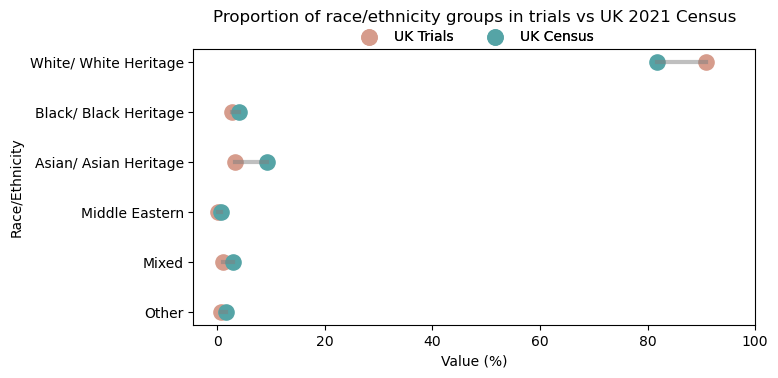

In [143]:
# Reverse the order of rows to match the desired y-axis order
filtered_rows = filtered_rows.iloc[::-1]

# Extract the race/ethnicity categories
categories = filtered_rows.index

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the "% of trials" and "UK Census" values for each category with larger dots
ax.scatter(filtered_rows['% of trial'], categories, color='#d69c8c', label='% of trials', s=120)
ax.scatter(filtered_rows['UK Census'], categories, color='#55a4a6', label='UK Census', s=120)

# Connect the dots with a faded grey line for each category
for category in categories:
    ax.plot([filtered_rows.loc[category, '% of trial'], filtered_rows.loc[category, 'UK Census']],
            [category, category], color='grey', alpha=0.5, linewidth=3)

# Set the y-axis ticks and labels
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)

# Set the x-axis ticks and labels
ax.set_xticks(np.linspace(0, 100, 6))
ax.set_xticklabels(range(0, 101, 20))

# Set the axis labels and title
ax.set_xlabel('Value (%)')
ax.set_ylabel('Race/Ethnicity')
ax.set_title('Proportion of race/ethnicity groups in trials vs UK 2021 Census', pad=20)

# Move the legend between the title and the plot
legend = ax.legend(['UK Trials', 'UK Census'], loc='upper center', bbox_to_anchor=(0.5, 1.117), ncol=2, frameon=False)
ax.add_artist(legend)

# Adjust the layout and margins
plt.tight_layout(pad=1.5)

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/trialsVScensus.png', dpi=300)

# Display the plot
plt.show()

## Race/ethnicities that were reported among trials that included any race/ethnicity enrollment results data and the proportion fo those trials that reported each individual race/ethnicity.

In [144]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 54 to 88
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   month_year                              203 non-null    datetime64[ns]
 1   race_res_dum                            203 non-null    int64         
 2   American Indian/ Alaska Native          203 non-null    int64         
 3   Asian/ Asian Heritage                   203 non-null    int64         
 4   Black/ Black Heritage                   203 non-null    int64         
 5   Hawaiian/ Other Pacific Islander        203 non-null    int64         
 6   Hispanic/ Latino                        203 non-null    int64         
 7   Middle Eastern                          203 non-null    int64         
 8   Mixed                                   203 non-null    int64         
 9   Other                                   203 non-null  

In [145]:
df_dummies_2 = df_dummies.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [146]:
df_dummies_2 = df_dummies_2[df_dummies_2['race_dum']>0]

In [147]:
df_sum = df_dummies_2.sum()

/tmp/ipykernel_195/2080977414.py:1: FutureWarning:

The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [148]:
df_sum = df_sum.to_frame()

In [149]:
df_sum.reset_index(inplace=True)

In [150]:
# Rename columns using a dictionary
new_columns = {'index': 'Race/Ethnicity', df_sum.columns[-1]: 'Count'}
df_sum = df_sum.rename(columns=new_columns)

In [151]:
df_sum['Proportion of trials'] = round((df_sum['Count']/241.0)*100,2)

In [152]:
df_sum

,Race/Ethnicity,Count,Proportion of trials
0,race_res_dum,6267.0,2600.41
1,American Indian/ Alaska Native,3.0,1.24
2,Asian/ Asian Heritage,114.0,47.30
3,Black/ Black Heritage,125.0,51.87
4,Hawaiian/ Other Pacific Islander,6.0,2.49
5,Hispanic/ Latino,25.0,10.37
6,Middle Eastern,7.0,2.90
7,Mixed,60.0,24.90
8,Other,15.0,6.22
9,Unknown or Not Reported,42.0,17.43


In [153]:
df_sum = df_sum.iloc[[1,2,3,4,5,6,7,8,9,10,11]]

In [154]:
df_sum

,Race/Ethnicity,Count,Proportion of trials
1,American Indian/ Alaska Native,3.0,1.24
2,Asian/ Asian Heritage,114.0,47.30
3,Black/ Black Heritage,125.0,51.87
4,Hawaiian/ Other Pacific Islander,6.0,2.49
5,Hispanic/ Latino,25.0,10.37
6,Middle Eastern,7.0,2.90
7,Mixed,60.0,24.90
8,Other,15.0,6.22
9,Unknown or Not Reported,42.0,17.43
10,White/ White Heritage,233.0,96.68


In [155]:
# Rename 'uk_races_dum' to 'Other'
df_sum['Race/Ethnicity'] = df_sum['Race/Ethnicity'].replace('uk_races_dum', 'All UK Race Groups')

/tmp/ipykernel_195/1167518604.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



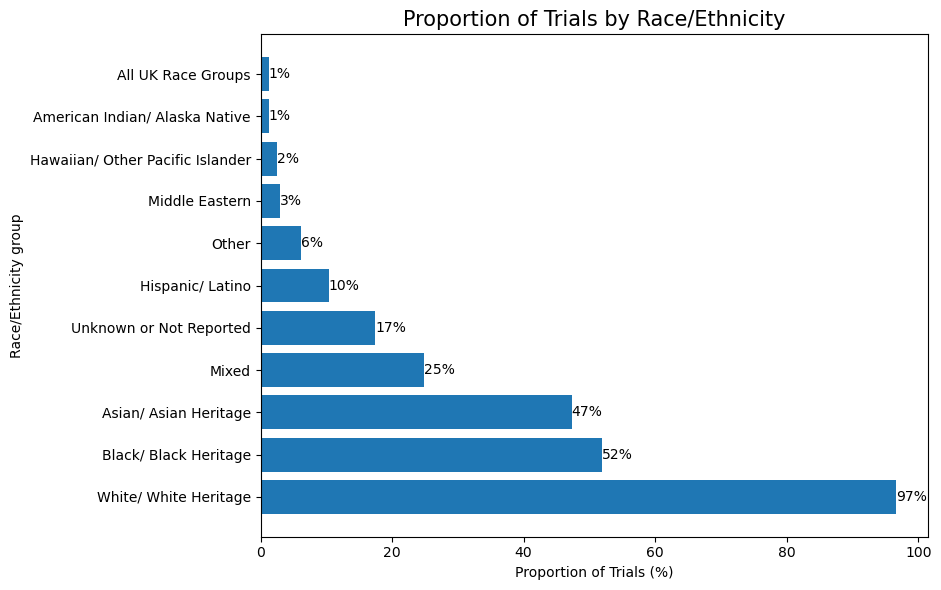

In [156]:
# Sort the DataFrame excluding the "uk_races_dum" row and append it at the end
df_sorted = df_sum[df_sum['Race/Ethnicity'] != 'All UK Race Groups'].sort_values('Proportion of trials', ascending=False)
df_sorted = pd.concat([df_sorted, df_sum[df_sum['Race/Ethnicity'] == 'All UK Race Groups']])

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df_sorted['Race/Ethnicity'], df_sorted['Proportion of trials'])

# Add value labels on the right side of the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}%', ha='left', va='center')

# Set the labels and title
ax.set_xlabel('Proportion of Trials (%)')
ax.set_ylabel('Race/Ethnicity group')
ax.set_title('Proportion of Trials by Race/Ethnicity', fontsize=15)

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1])  

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/bar_chart_all.png', dpi=300)

# Display the plot
plt.show()

## Distribution of trials according to race/ethnicity of enrollees

In [157]:
dist_df = trial_results_race[trial_results_race['uk_races_dum']==1]

In [158]:
dist_df

,nct_id,start_date_x,race_res_dum,year_x,start_date_y,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,race_dum,number of new trials with results
197,NCT01252953,2011-06-30,36,2011,2011-06-30,0.0,17742.0,656.0,0.0,470.0,0.0,66.0,192.0,50268.0,52402.0,1.0,1,1
656,NCT03180801,2016-08-18,32,2016,2016-08-18,0.0,8.0,10.0,0.0,2.0,0.0,14.0,4.0,0.0,208.0,1.0,1,1
723,NCT03559205,2018-07-10,21,2018,2018-10-07,0.0,10.0,4.0,0.0,0.0,0.0,4.0,6.0,4.0,518.0,1.0,1,1


In [159]:
dist_df = dist_df.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16]]

In [160]:
dist_df['total participants'] = dist_df.sum(axis=1)

/tmp/ipykernel_195/332937179.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
# Calculate the proportion of enrollees for each ethnicity
ethnicities = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Calculate the proportion of enrollees for each race/ethnicity
for ethnicity in ethnicities:
    dist_df[ethnicity + '_Proportion'] = round(dist_df[ethnicity] / dist_df['total participants'] * 100,2)

/tmp/ipykernel_195/2665245422.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_195/2665245422.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_195/2665245422.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_195/266

In [162]:
dist_df

,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,...,total participants,White/ White Heritage_Proportion,Black/ Black Heritage_Proportion,Hispanic/ Latino_Proportion,Asian/ Asian Heritage_Proportion,American Indian/ Alaska Native_Proportion,Middle Eastern_Proportion,Hawaiian/ Other Pacific Islander_Proportion,Other_Proportion,Mixed_Proportion
197,0.0,17742.0,656.0,0.0,470.0,0.0,66.0,192.0,50268.0,52402.0,...,121798.0,43.02,0.54,0.39,14.57,0.0,0.0,0.0,0.16,0.05
656,0.0,8.0,10.0,0.0,2.0,0.0,14.0,4.0,0.0,208.0,...,248.0,83.87,4.03,0.81,3.23,0.0,0.0,0.0,1.61,5.65
723,0.0,10.0,4.0,0.0,0.0,0.0,4.0,6.0,4.0,518.0,...,548.0,94.53,0.73,0.00,1.82,0.0,0.0,0.0,1.09,0.73


In [163]:
dist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 197 to 723
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   American Indian/ Alaska Native               3 non-null      float64
 1   Asian/ Asian Heritage                        3 non-null      float64
 2   Black/ Black Heritage                        3 non-null      float64
 3   Hawaiian/ Other Pacific Islander             3 non-null      float64
 4   Hispanic/ Latino                             3 non-null      float64
 5   Middle Eastern                               3 non-null      float64
 6   Mixed                                        3 non-null      float64
 7   Other                                        3 non-null      float64
 8   Unknown or Not Reported                      3 non-null      float64
 9   White/ White Heritage                        3 non-null      float64
 10  uk

In [164]:
dist_df_2 = dist_df.iloc[:,[12,13,14,15,16,17,18,19,20,21]]

In [165]:
dist_df_2.head()

,total participants,White/ White Heritage_Proportion,Black/ Black Heritage_Proportion,Hispanic/ Latino_Proportion,Asian/ Asian Heritage_Proportion,American Indian/ Alaska Native_Proportion,Middle Eastern_Proportion,Hawaiian/ Other Pacific Islander_Proportion,Other_Proportion,Mixed_Proportion
197,121798.0,43.02,0.54,0.39,14.57,0.0,0.0,0.0,0.16,0.05
656,248.0,83.87,4.03,0.81,3.23,0.0,0.0,0.0,1.61,5.65
723,548.0,94.53,0.73,0.00,1.82,0.0,0.0,0.0,1.09,0.73


In [166]:
dist_df_2.to_csv('dist_df_2.csv')

/tmp/ipykernel_195/2884882445.py:19: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/tmp/ipykernel_195/2884882445.py:19: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/tmp/ipykernel_195/2884882445.py:19: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



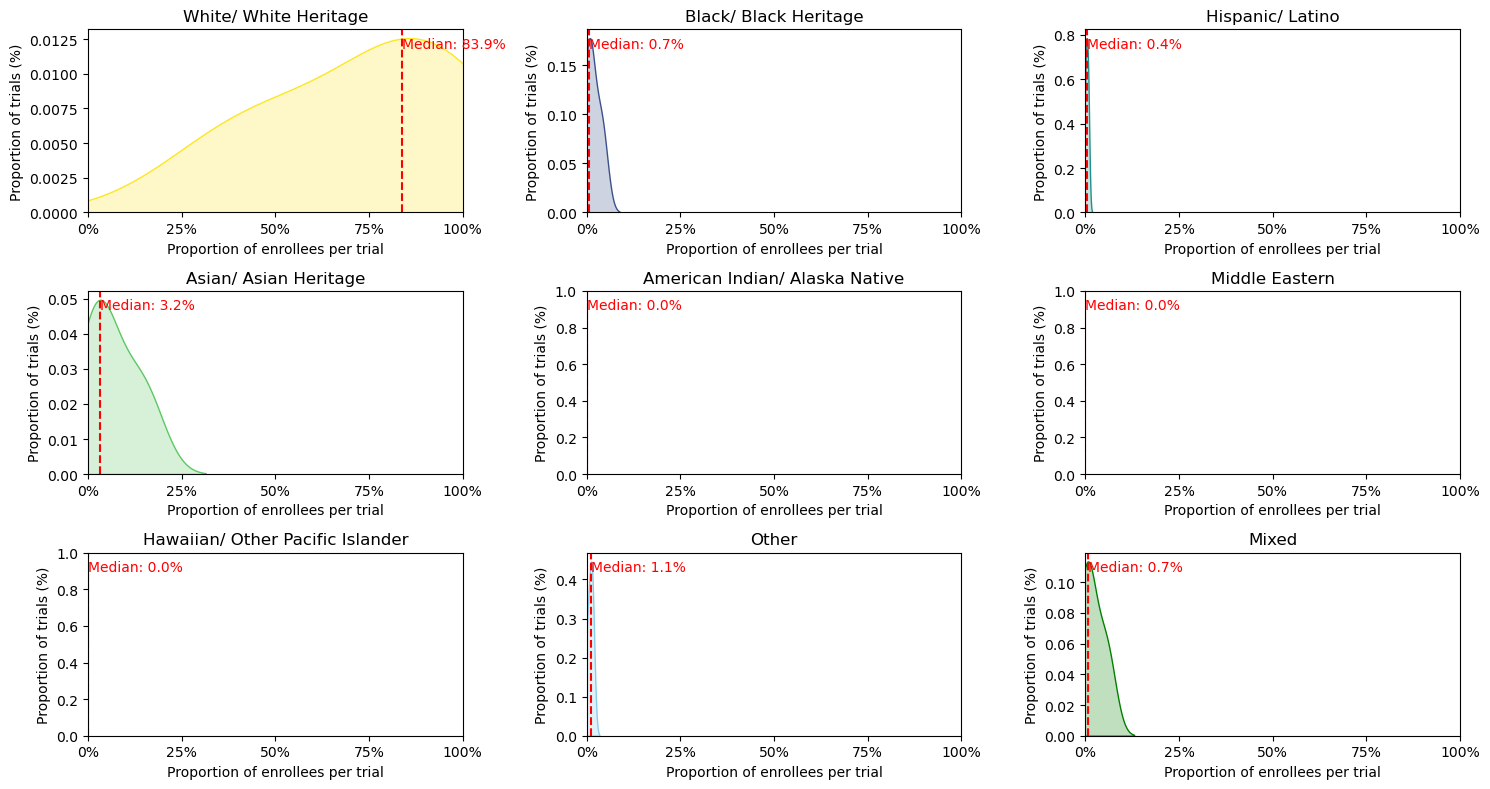

In [167]:
# Define the desired order of columns
columns_to_plot = ['White/ White Heritage_Proportion','Black/ Black Heritage_Proportion','Hispanic/ Latino_Proportion','Asian/ Asian Heritage_Proportion','American Indian/ Alaska Native_Proportion','Middle Eastern_Proportion','Hawaiian/ Other Pacific Islander_Proportion','Other_Proportion','Mixed_Proportion']

# Set the number of columns and rows for subplots
num_columns = 3
num_rows = 3

# Define colors for each graph
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate over each column and plot the line histogram
for i, column in enumerate(columns_to_plot):
    sns.kdeplot(data=dist_df_2[column], ax=axes[i], fill=True, color=colors[i % len(colors)])
    axes[i].set_xlim(0, 100)  # Set x-axis limits to 0-100%
    axes[i].set_ylim(0, None)  # Set y-axis to automatically adjust
    axes[i].set_xlabel('Proportion of enrollees per trial')
    axes[i].set_ylabel('Proportion of trials (%)')
    axes[i].set_title(column.split('_')[0])  # Change the title to each graph

    # Calculate and plot the median line
    median_value = dist_df_2[column].median()
    axes[i].axvline(median_value, color='red', linestyle='--')
    
    # Add text annotation for the median value
    axes[i].text(median_value, axes[i].get_ylim()[1]*0.9, f"Median: {median_value:.1f}%", color='red', ha='left')

    # Set custom x-axis tick positions and labels
    axes[i].set_xticks([0, 25, 50, 75, 100])
    axes[i].set_xticklabels(['0%', '25%', '50%', '75%', '100%'])

# Adjust the spacing between subplots
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/race_distributions.png', dpi=300)

# Show the plot
plt.show()


## Average number of participants per trial

In [168]:
average_participants = df_race_trials.copy()

In [169]:
df_race_trials

,nct_id,start_date,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count,year
0,NCT00129987,2003-11-30,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0,1,2003
1,NCT00135226,2005-03-31,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0,1,2005
2,NCT00508196,2006-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,1,2006
3,NCT00509925,2007-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,1,2007
4,NCT00534703,2014-07-31,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NCT04540627,2020-06-07,2.0,0.0,4.0,0.0,0.0,0.0,12.0,0.0,0.0,94.0,0,1,2020
237,NCT04604795,2020-04-11,0.0,14.0,16.0,0.0,0.0,0.0,2.0,0.0,0.0,98.0,0,1,2020
238,NCT04680273,2021-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0,1,2021
239,NCT04796831,2021-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0,1,2021


In [170]:
average_participants['average_participants'] = average_participants[['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed','Unknown or Not Reported']].sum(axis=1)

In [171]:
average_participants.head()

,nct_id,start_date,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count,year,average_participants
0,NCT00129987,2003-11-30,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0,1,2003,1134.0
1,NCT00135226,2005-03-31,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0,1,2005,30960.0
2,NCT00508196,2006-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,1,2006,22.0
3,NCT00509925,2007-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,1,2007,23.0
4,NCT00534703,2014-07-31,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0,1,2014,10.0


In [172]:
print('There are ' + str(int(average_participants.average_participants.mean())) + ' participants per trial.')

There are 785 participants per trial.


In [173]:
avg_part_year = average_participants.groupby(['year']).sum()

/tmp/ipykernel_195/4199202262.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [174]:
avg_part_year.reset_index(inplace=True)

In [175]:
avg_part_year

,year,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count,average_participants
0,2003,0.0,182.0,92.0,0.0,0.0,0.0,28.0,0.0,24.0,808.0,0,1,1134.0
1,2005,0.0,0.0,280.0,0.0,0.0,368.0,0.0,0.0,442.0,29870.0,0,1,30960.0
2,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0,1,22.0
3,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,1,23.0
4,2008,0.0,28.0,28.0,0.0,0.0,0.0,0.0,0.0,8.0,538.0,0,4,602.0
5,2009,0.0,8.0,25.0,0.0,0.0,0.0,7.0,0.0,0.0,1058.0,0,7,1098.0
6,2010,0.0,173.0,141.0,0.0,4.0,0.0,0.0,44.0,90.0,2536.0,0,9,2988.0
7,2011,0.0,17742.0,662.0,0.0,470.0,0.0,66.0,300.0,50268.0,54596.0,1,7,124104.0
8,2012,0.0,34.0,36.0,6.0,12.0,0.0,14.0,12.0,49.0,635.0,0,9,798.0
9,2013,0.0,51.0,70.0,0.0,2.0,0.0,19.0,3.0,4.0,2070.0,0,21,2219.0


In [176]:
avg_part_year = avg_part_year.iloc[:,[0,12,13]]

In [177]:
avg_part_year['average participants per trial'] = round(avg_part_year['average_participants']/avg_part_year['count'],0)

/tmp/ipykernel_195/1682114084.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
avg_part_year

,year,count,average_participants,average participants per trial
0,2003,1,1134.0,1134.0
1,2005,1,30960.0,30960.0
2,2006,1,22.0,22.0
3,2007,1,23.0,23.0
4,2008,4,602.0,150.0
5,2009,7,1098.0,157.0
6,2010,9,2988.0,332.0
7,2011,7,124104.0,17729.0
8,2012,9,798.0,89.0
9,2013,21,2219.0,106.0


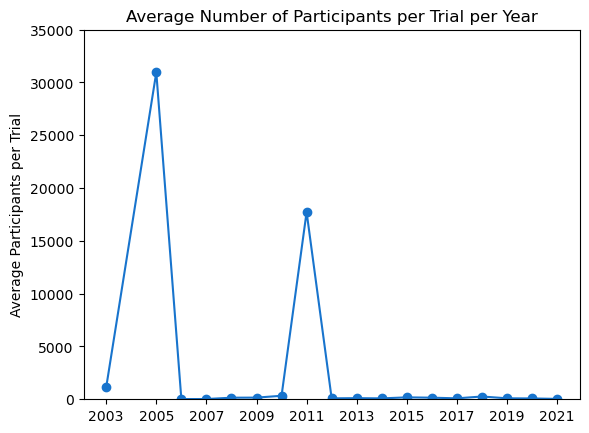

In [179]:
plt.plot(avg_part_year['year'], avg_part_year['average participants per trial'], marker='o', color='#1874CD')

# Set the x-axis tick positions and labels
plt.xticks(range(avg_part_year['year'].min(), avg_part_year['year'].max()+2, 2))

plt.ylabel('Average Participants per Trial')
plt.title('Average Number of Participants per Trial per Year')
plt.grid(False)

# Set the y-axis limit with a small gap at the start
y_start = 0  # Adjust the gap as needed
y_end = 35000  # Change the upper limit as needed
plt.ylim(y_start, y_end)

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/avg_participants_line.png', dpi=300)

plt.show()

## Phases

In [180]:
df_race_phase

,phase,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count
0,Early Phase 1,0.0,12.0,16.0,0.0,2.0,0.0,6.0,0.0,1.0,441.0,0,3
1,Not Applicable,4.0,536.0,297.0,19.0,9.0,4.0,161.0,131.0,250.0,8693.0,1,51
2,Phase 1,2.0,316.0,450.0,8.0,48.0,8.0,136.0,14.0,38.0,8926.0,0,106
3,Phase 1/Phase 2,0.0,16.0,2.0,0.0,0.0,0.0,0.0,14.0,53.0,455.0,0,10
4,Phase 2,0.0,93.0,134.0,4.0,22.0,2.0,49.0,6.0,83.0,4504.0,1,40
5,Phase 2/Phase 3,0.0,178.0,112.0,0.0,0.0,0.0,0.0,44.0,2.0,2338.0,0,3
6,Phase 3,2.0,17814.0,704.0,4.0,492.0,0.0,100.0,192.0,50294.0,57274.0,1,9
7,Phase 4,0.0,182.0,407.0,0.0,10.0,368.0,10.0,11.0,480.0,32313.0,0,19


In [181]:
df_race_phase_viz = df_race_phase.drop(['uk_races_dum','count'],axis=1)

In [182]:
# Drop the "Not Applicable" row
df_race_phase_viz = df_race_phase_viz[df_race_phase_viz['phase'] != 'Not Applicable']

In [183]:
df_race_phase_viz.to_csv('df_race_phase_viz.csv')

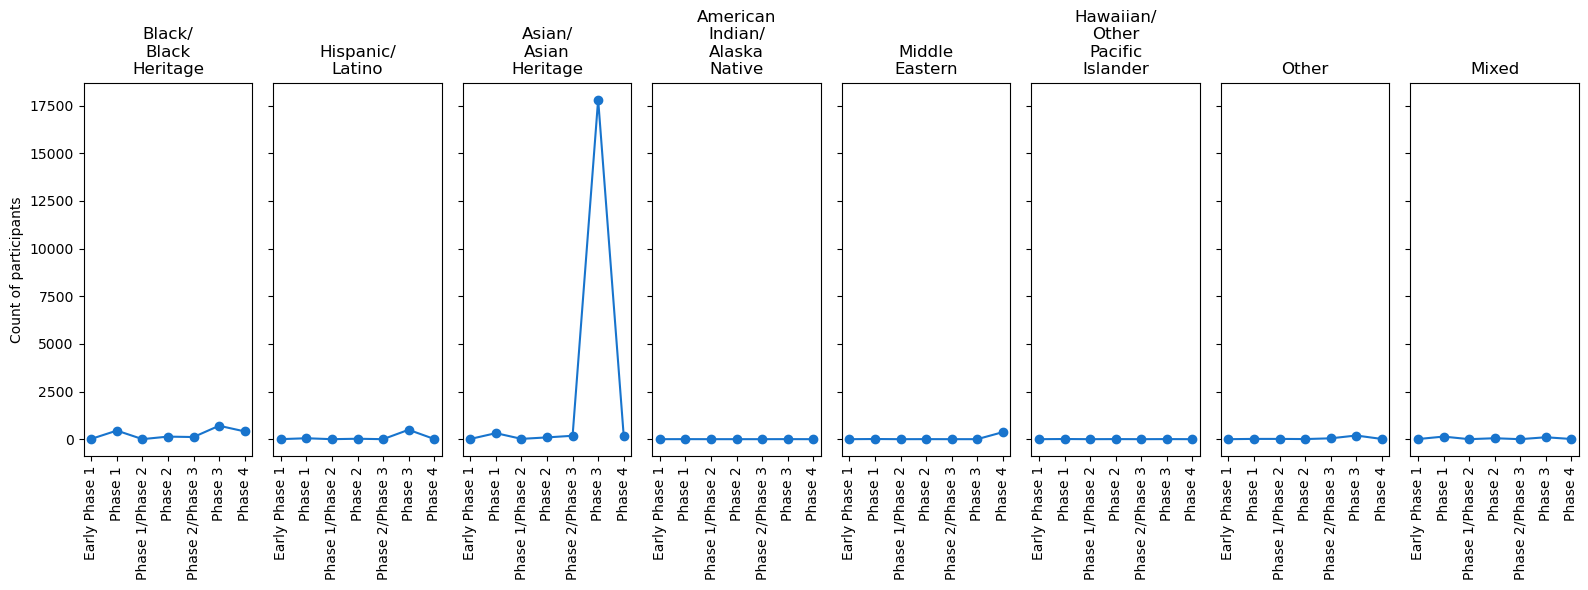

In [184]:
# Extract relevant columns for race/ethnicity and phase
race_ethnicity = ['Black/ Black Heritage', 'Hispanic/ Latino', 'Asian/ Asian Heritage', 'American Indian/ Alaska Native', 'Middle Eastern', 'Hawaiian/ Other Pacific Islander', 'Other', 'Mixed']
phases = ['Early Phase 1', 'Phase 1', 'Phase 1/Phase 2', 'Phase 2', 'Phase 2/Phase 3', 'Phase 3', 'Phase 4']
df_plot = df_race_phase_viz[race_ethnicity + ['phase']]

# Set up the plot
fig, axs = plt.subplots(1, len(race_ethnicity), figsize=(16, 6), sharey=True)

# Plot each race next to each other
for i, race in enumerate(race_ethnicity):
    ax = axs[i]
    values = df_plot.loc[df_plot['phase'].isin(phases)][race].tolist()
    ax.plot(range(len(values)), values, marker='o', linestyle='-', color='#1874CD', label=race)

    # Set x-axis labels
    ax.set_xticks(range(len(phases)))
    ax.set_xticklabels(phases, rotation=90)

    # Set y-axis label (only for the first subplot)
    if i == 0:
        ax.set_ylabel('Count of participants')

    # Wrap the race name and set title
    wrapped_race = '\n'.join(textwrap.wrap(race, width=10))
    ax.set_title(wrapped_race)

# Adjust spacing between subplots
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/participants_phase_notWhite.png', dpi=300)

# Show the plots
plt.show()

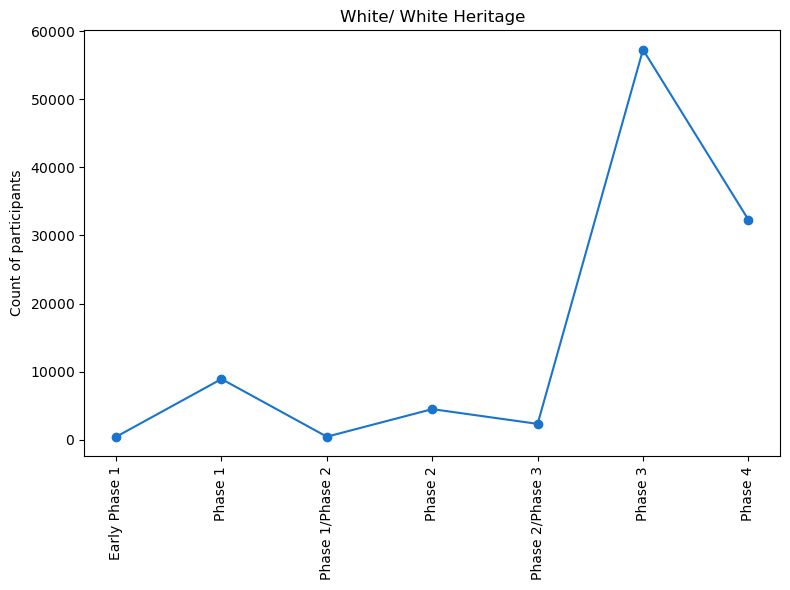

In [185]:
# Extract relevant columns for race/ethnicity and phase
race_ethnicity = ['White/ White Heritage']
phases = ['Early Phase 1', 'Phase 1', 'Phase 1/Phase 2', 'Phase 2', 'Phase 2/Phase 3', 'Phase 3', 'Phase 4']
df_plot = df_race_phase_viz[race_ethnicity + ['phase']]

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the race
values = df_plot.loc[df_plot['phase'].isin(phases)][race_ethnicity[0]].tolist()
ax.plot(range(len(values)), values, marker='o', linestyle='-', color='#1874CD', label=race_ethnicity[0])

# Set x-axis labels
ax.set_xticks(range(len(phases)))
ax.set_xticklabels(phases, rotation=90)

# Set y-axis label
ax.set_ylabel('Count of participants')

# Set title and legend
ax.set_title(race_ethnicity[0])

# Format y-axis tick labels as whole numbers
plt.gca().get_yaxis().set_major_formatter(plt.ScalarFormatter(useOffset=False, useMathText=True))

# Adjust padding around the figure
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/participants_phase_WHITE.png', dpi=300)

# Show the plot
plt.show()

In [186]:
# Calculate the sum for each row
df_race_phase_viz['Phase total'] = df_race_phase_viz.sum(axis=1)

/tmp/ipykernel_195/3369688594.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [187]:
df_race_phase_viz

,phase,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,Phase total
0,Early Phase 1,0.0,12.0,16.0,0.0,2.0,0.0,6.0,0.0,1.0,441.0,478.0
2,Phase 1,2.0,316.0,450.0,8.0,48.0,8.0,136.0,14.0,38.0,8926.0,9946.0
3,Phase 1/Phase 2,0.0,16.0,2.0,0.0,0.0,0.0,0.0,14.0,53.0,455.0,540.0
4,Phase 2,0.0,93.0,134.0,4.0,22.0,2.0,49.0,6.0,83.0,4504.0,4897.0
5,Phase 2/Phase 3,0.0,178.0,112.0,0.0,0.0,0.0,0.0,44.0,2.0,2338.0,2674.0
6,Phase 3,2.0,17814.0,704.0,4.0,492.0,0.0,100.0,192.0,50294.0,57274.0,126876.0
7,Phase 4,0.0,182.0,407.0,0.0,10.0,368.0,10.0,11.0,480.0,32313.0,33781.0


In [188]:
# Calculate the percentage for each race in each phase
races = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed','Unknown or Not Reported']

for race in races:
    df_race_phase_viz[race + ' (%)'] = round((df_race_phase_viz[race] / df_race_phase_viz['Phase total']) * 100,2)
    
df_race_phase_viz

,phase,American Indian/ Alaska Native,Asian/ Asian Heritage,Black/ Black Heritage,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,...,White/ White Heritage (%),Black/ Black Heritage (%),Hispanic/ Latino (%),Asian/ Asian Heritage (%),American Indian/ Alaska Native (%),Middle Eastern (%),Hawaiian/ Other Pacific Islander (%),Other (%),Mixed (%),Unknown or Not Reported (%)
0,Early Phase 1,0.0,12.0,16.0,0.0,2.0,0.0,6.0,0.0,1.0,...,92.26,3.35,0.42,2.51,0.00,0.00,0.00,0.00,1.26,0.21
2,Phase 1,2.0,316.0,450.0,8.0,48.0,8.0,136.0,14.0,38.0,...,89.74,4.52,0.48,3.18,0.02,0.08,0.08,0.14,1.37,0.38
3,Phase 1/Phase 2,0.0,16.0,2.0,0.0,0.0,0.0,0.0,14.0,53.0,...,84.26,0.37,0.00,2.96,0.00,0.00,0.00,2.59,0.00,9.81
4,Phase 2,0.0,93.0,134.0,4.0,22.0,2.0,49.0,6.0,83.0,...,91.97,2.74,0.45,1.90,0.00,0.04,0.08,0.12,1.00,1.69
5,Phase 2/Phase 3,0.0,178.0,112.0,0.0,0.0,0.0,0.0,44.0,2.0,...,87.43,4.19,0.00,6.66,0.00,0.00,0.00,1.65,0.00,0.07
6,Phase 3,2.0,17814.0,704.0,4.0,492.0,0.0,100.0,192.0,50294.0,...,45.14,0.55,0.39,14.04,0.00,0.00,0.00,0.15,0.08,39.64
7,Phase 4,0.0,182.0,407.0,0.0,10.0,368.0,10.0,11.0,480.0,...,95.65,1.20,0.03,0.54,0.00,1.09,0.00,0.03,0.03,1.42


In [189]:
df_race_phase_perc = df_race_phase_viz.iloc[:,[0,12,13,14,15,16,17,18,19,20,21]]

In [190]:
df_race_phase_perc.to_csv('df_race_phase_perc.csv')

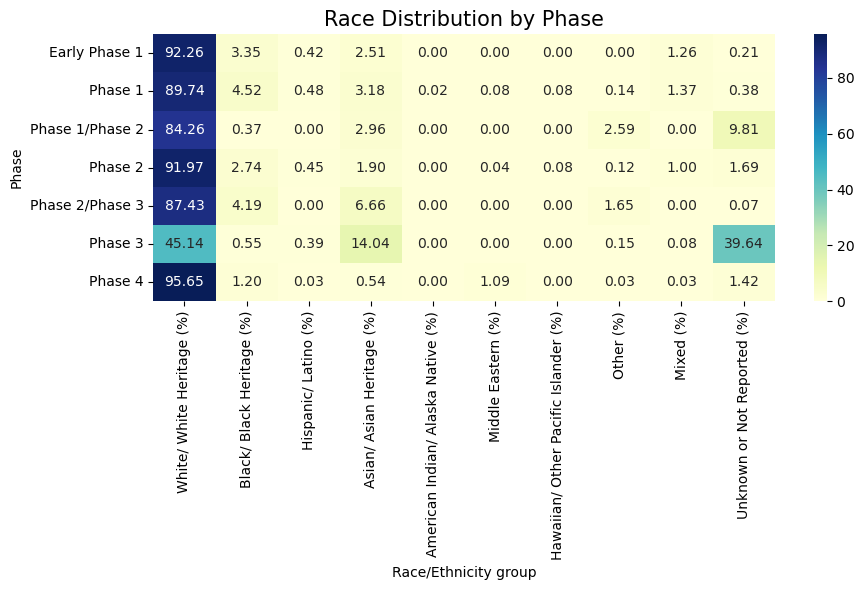

In [191]:
# Set the "Phase" column as the index
df_race_phase_perc.set_index('phase', inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_race_phase_perc, annot=True, fmt=".2f", cmap='YlGnBu')

# Customize the plot
plt.title('Race Distribution by Phase', fontsize=15)
plt.xlabel('Race/Ethnicity group')
plt.ylabel('Phase')

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1]) 

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/heatmap_race_phase.png', dpi=300)

# Display the heatmap
plt.show()

# Cancer

In [192]:
uk_filtered.head()

,nct_id,start_date,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results
0,NCT00032175,2002-04-30,Gemcitabine With or Without Capecitabine in Tr...,A Phase III Multicenter Randomized Clinical Tr...,Completed,Phase 3,508.0,Anticipated,NaN,0
1,NCT00040690,2008-11-30,Combination Chemotherapy in Treating Patients ...,A Clinicopathological Study In Burkitts's And ...,Completed,Phase 2,120.0,Anticipated,NaN,0
2,NCT00041223,2002-09-30,IH636 Grape Seed Extract in Treating Hardening...,"Double-Blind, Placebo-Controlled, Randomized P...",Unknown status,Phase 2,NaN,NaN,NaN,0
3,NCT00041262,2004-11-30,Combination Chemotherapy in Treating Patients ...,A Prospective Randomized Trial Comparing Stand...,Unknown status,Phase 3,1300.0,Anticipated,NaN,0
4,NCT00045045,2002-05-31,Positron Emission Tomography in Detecting Test...,A Study Of 18 FDG PET In The Prediction Of Rel...,Completed,Not Applicable,NaN,NaN,NaN,0


In [194]:
# Create a list of cancer-related terms
cancer_terms = ['cancer', 'tumor', 'tumour', 'carcinoma', 'lymphoma', 'leukemia', 'sarcoma', 'glioblastoma',
                'glioma', 'neuroblastoma', 'papilloma', 'melanoma', 'metastasis', 'malignant', 'benign',
                'leukemia', 'histiocytoma', 'adenocarcinoma', 'aldosteronoma', 'adamantinoma', 'ameloblastoma',
                'angiofibroma', 'angiosarcoma', 'astroblastoma', 'astrocytoma', 'liponeurocytoma', 'cholangiocarcinoma',
                'chondroblastoma', 'chondrosarcoma', 'chordoma', 'nephroma', 'craniopharyngioma', 'cystadenoma',
                'nephroblastoma', 'chondrosarcoma', 'trichoepithelioma', 'ependymoma', 'hemangioendothelioma',
                'erythroleukemia', 'fibroadenoma', 'fibrosarcoma', 'germinoma', 'glioblastoma', 'osteosarcoma',
                'rhabdomyosarcoma', 'leiomyosarcoma', 'myxosarcoma', 'mesenchymoma', 'astrocytoma', 'ependymoma',
                'neuroblastoma', 'oligodendroglioma', 'pheochromocytoma', 'retinoblastoma', 'cholangiocarcinoma',
                'myelodysplastic', 'liposarcoma', 'histiocytoma', 'macroglobulinaemia', 'polycythaemia vera',
                'essential thrombocythaemia', 'myelofibrosis', 'gastrinoma', 'hemangioendothelioma', 'hepatoblastoma',
                'insulinoma', 'keratoacanthoma', 'leiomyosarcoma', 'liposarcoma', 'mesenchymoma', 'medulloepithelioma',
                'meningioma', 'nephroma', 'myxofibrosarcoma', 'nephroblastoma', 'esthesioneuroblastoma', 'pheochromocytoma',
                'pineoblastoma', 'plasmacytoma', 'prolactinoma', 'fibrosarcoma', 'somatostatinoma', 'haemangioblastoma',
                'thymoma', 'seminoma', 'dysgerminoma', 'oncocytic', 'paraganglioma', 'teratoma', 'mesothelioma',
                'neoplasia', 'phaeochromocytoma', 'acoustic neuroma', 'neuroma', 'nephroblastoma', 'mycosis fungoides',
                'vipoma', 'oncocytic', 'oncocytomas', 'teratoma', 'gestational trophoblastic disease', 'hodgkin',
                'burkitt', 'wilms', 'kaposi', 'paget', 'edwig', 'schwannoma', 'verner-morrison', 'waldenström',
                'von recklinghausen', 'von hippel-lindau', 'peutz-jeghers', 'neurofibromatosis type 2', 'carney', 'gorlin']

# Create a regex pattern by joining the cancer terms and making them case-insensitive
pattern = re.compile(r'|'.join(cancer_terms), re.IGNORECASE)

# Filter for cancer-related trials
cancer_df = uk_filtered[
    (uk_filtered['official_title'].str.contains(pattern, na=False)) |
    (uk_filtered['brief_title'].str.contains(pattern, na=False))
]

cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 8764
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nct_id           931 non-null    object 
 1   start_date       931 non-null    object 
 2   brief_title      931 non-null    object 
 3   official_title   929 non-null    object 
 4   overall_status   931 non-null    object 
 5   phase            931 non-null    object 
 6   enrollment       924 non-null    float64
 7   enrollment_type  913 non-null    object 
 8   number_of_arms   752 non-null    float64
 9   results          931 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 80.0+ KB


There are **931** UK Clinical Interventional trials from 2002-2022 that were focused on cancer related deseases (e.g., cacner, lymphoma, glioblastoma, metastasis, malignant, benign, leukemia).

In [195]:
cancer_df['results'].value_counts(normalize=True)

0    0.932331
1    0.067669
Name: results, dtype: float64

**6.8%** of those trials released results.

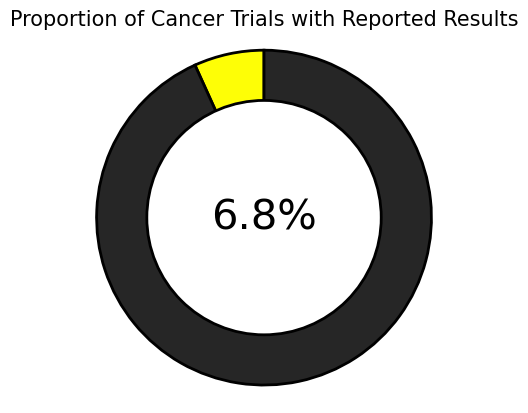

In [196]:
# Calculate the counts
cancer_count_results = cancer_df['results'].sum()
cancer_count_no_results = len(cancer_df) - cancer_count_results

# Calculate the proportions
cancer_total_trials = len(cancer_df)
cancer_proportion_results = cancer_count_results / cancer_total_trials
cancer_proportion_no_results = cancer_count_no_results / cancer_total_trials

# Create the donut chart
labels = ['Results Reported', 'Results Not Reported']
sizes = [cancer_proportion_results, cancer_proportion_no_results]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

plt.pie(sizes, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of Cancer Trials with Reported Results', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Results Reported" in the middle of the donut chart
plt.text(0, 0, f'{cancer_proportion_results*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/cancer_donut_chart.png', dpi=300)

# Display the chart
plt.show()

In [197]:
cancer_df_res = cancer_df[cancer_df['results']==1]

In [198]:
print('There are ' + str(cancer_df_res.nct_id.nunique()) + ' trials that released results and are focused around cancer research.')

There are 63 trials that released results and are focused around cancer research.


In [199]:
cancer_race = pd.merge(cancer_df_res, df_race_trials, on='nct_id',how='inner')

cancer_race.head()

,nct_id,start_date_x,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,...,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count,year
0,NCT00977431,2009-09-17,Open Label Trial to Explore Safety of Combinin...,"Phase I, Open Label Trial to Explore Safety of...",Completed,Phase 1,36.0,Actual,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0,1,2009
1,NCT01185548,2010-07-31,A Drug Interaction Study of Tasisulam in Patie...,The Effect of Tasisulam on the CYP2C9-Mediated...,Terminated,Phase 1,4.0,Actual,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,1,2010
2,NCT01559818,2012-02-29,A Long Term Follow up Study for Patients Who P...,An Open Label Long Term Follow up Study for Pa...,Terminated,Phase 1/Phase 2,10.0,Actual,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0,1,2012
3,NCT01743560,2013-01-31,An Open Label Study of Postmenopausal Women Wi...,"A Phase IV Multicentre, Open Label Study of Po...",Completed,Phase 4,52.0,Actual,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,48.0,0,1,2013
4,NCT01791985,2012-07-31,AZD4547 & Anastrozole or Letrozole (NSAIs) in ...,A Single Arm Phase IIa Study (With Combination...,Completed,Phase 1/Phase 2,52.0,Actual,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0,1,2012


In [200]:
print('There are ' + str(cancer_race.nct_id.nunique()) + ' trials that released results on race and are focused around cancer research.')

There are 18 trials that released results on race and are focused around cancer research.


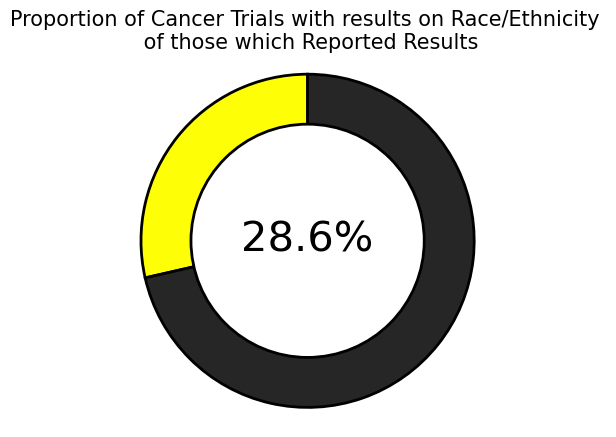

In [201]:
# Calculate the counts
cancer_count_results = cancer_race.nct_id.nunique()
cancer_count_no_results = cancer_df_res.nct_id.nunique() - cancer_count_results

# Calculate the proportions
cancer_total_trials = cancer_df_res.nct_id.nunique()
cancer_proportion_results = cancer_count_results / cancer_total_trials
cancer_proportion_no_results = cancer_count_no_results / cancer_total_trials

# Create the donut chart
labels = ['Results Reported', 'Results Not Reported']
sizes = [cancer_proportion_results, cancer_proportion_no_results]
colors = ['#fefe06', '#262626']
outline_color = '#000000'  # Outline color

plt.pie(sizes, labels=None, colors=colors, startangle=90, wedgeprops={'edgecolor': outline_color, 'linewidth': 2})
plt.title('Proportion of Cancer Trials with results on Race/Ethnicity \n of those which Reported Results', fontsize=15)

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec=outline_color, lw=2)  # Add outline to the center circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the value of "Results Reported" in the middle of the donut chart
plt.text(0, 0, f'{cancer_proportion_results*100:.1f}%', horizontalalignment='center', verticalalignment='center', fontsize=30, color='black')

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/cancer_race_results_donut_chart.png', dpi=300)

# Display the chart
plt.show()

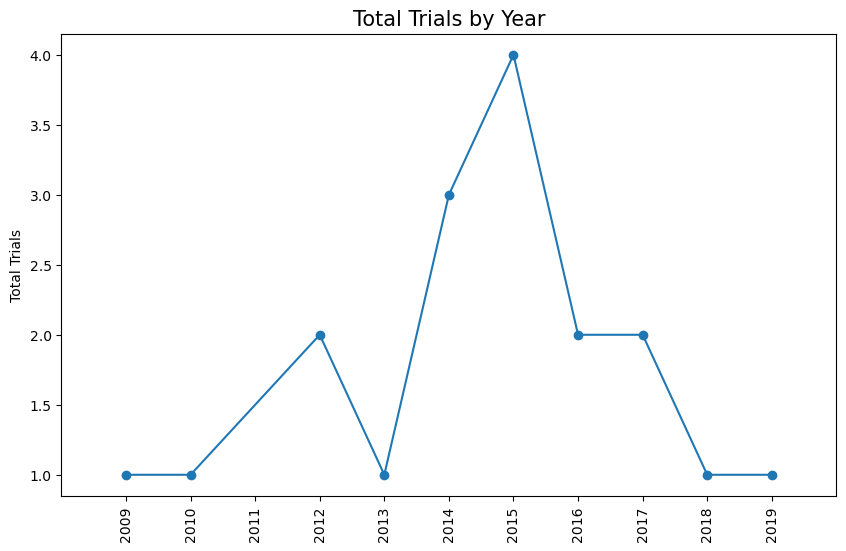

In [202]:
# Group the trials by year and calculate the total count
trial_count_by_year = cancer_race.groupby('year')['count'].sum()

# Plot the total trials by year
plt.figure(figsize=(10, 6))
trial_count_by_year.plot(marker='o')
plt.ylabel('Total Trials')
plt.xlabel('')
plt.title('Total Trials by Year', fontsize=15)
plt.xticks(range(min(cancer_race['year']), max(cancer_race['year'])+1), rotation=90)
plt.xlim(min(cancer_race['year'])-1, max(cancer_race['year'])+1)
plt.grid(False)

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/Cancer_trials_years.png', dpi=300)

plt.show()

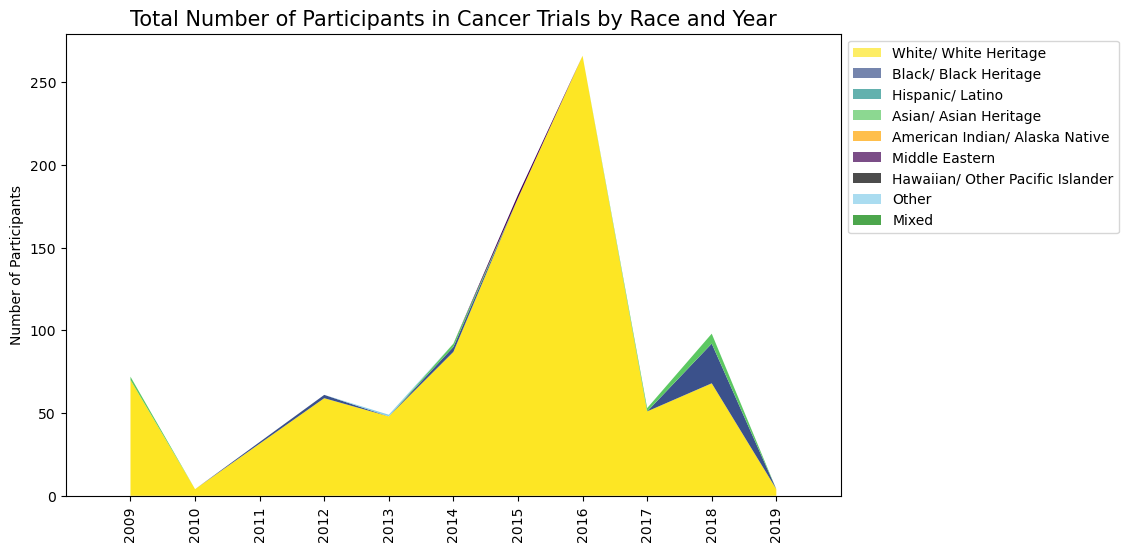

In [203]:
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

# Extract unique race/ethnicity values
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

race_ethnicities = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Group the trials by year and race, and calculate the total count for each race by year
race_count_by_year = cancer_race.groupby(['year'])[race_ethnicities].sum()

# Create the stacked area chart
plt.figure(figsize=(10, 6))
plt.stackplot(race_count_by_year.index, race_count_by_year.values.T, labels=race_ethnicities, colors=colors[:len(race_ethnicities)])

# Add the custom legend
patch_handles = [mpatches.Patch(facecolor=colors[i], alpha=0.7) for i in range(len(race_ethnicities))]
legend_labels = race_ethnicities
plt.legend(patch_handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.ylabel('Number of Participants')
plt.title('Total Number of Participants in Cancer Trials by Race and Year', fontsize=15)
plt.xticks(range(min(cancer_race['year']), max(cancer_race['year'])+1), rotation=90)
plt.xlim(min(cancer_race['year'])-1, max(cancer_race['year'])+1)
plt.grid(False)

# Save the chart as an image file using the savefig() function
plt.savefig('/project/charts_uk_exclusive/Cancer_trials_stacked_area_years.png', dpi=300)

plt.show()


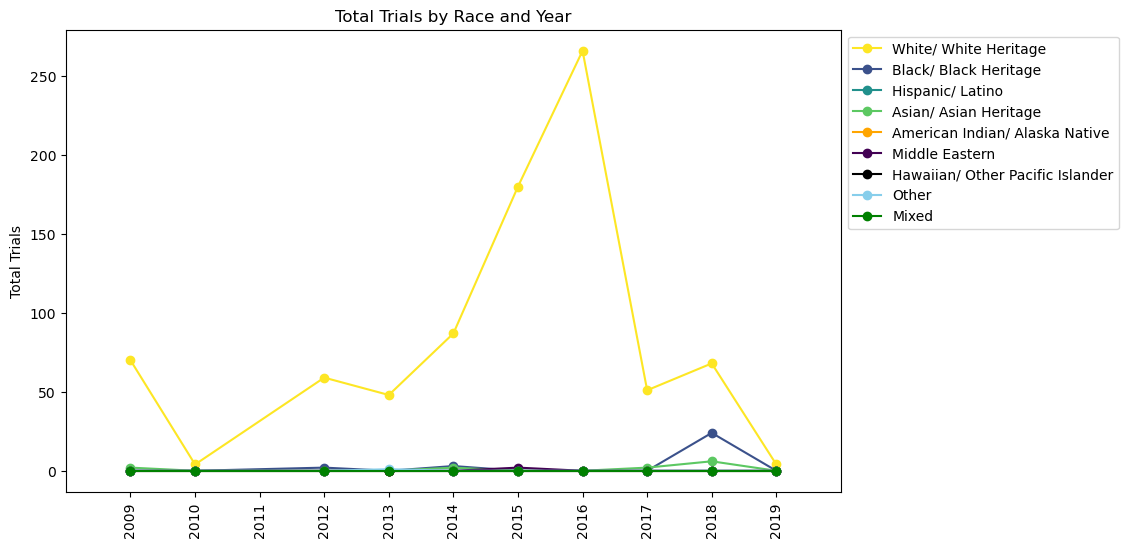

In [205]:
# Define the colors for each race/ethnicity
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

race_ethnicities = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Group the trials by year and race, and calculate the total count for each race by year
race_count_by_year = cancer_race.groupby(['year'])[race_ethnicities].sum()

# Plot the lines for each race
plt.figure(figsize=(10, 6))
for i, race in enumerate(race_count_by_year.columns):
    plt.plot(race_count_by_year.index, race_count_by_year[race], marker='o', color=colors[i], label=race)

plt.ylabel('Total Trials')
plt.title('Total Trials by Race and Year')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(min(cancer_race['year']), max(cancer_race['year'])+1), rotation=90)
plt.xlim(min(cancer_race['year'])-1, max(cancer_race['year'])+1)
plt.grid(False)

# Save the chart as an image file using the savefig() function
plt.savefig('/project/charts_uk_exclusive/Cancer_trials_years.png', dpi=300)

plt.show()

In [206]:
# Define the colors for each race/ethnicity
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']

race_ethnicities = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Group the trials by year and race, and calculate the total count for each race by year
race_count_by_year = cancer_race.groupby(['year'])[race_ethnicities].sum()

# Create an empty list to store the line traces
data = []

# Create a line trace for each race
for i, race in enumerate(race_count_by_year.columns):
    trace = go.Scatter(
        x=race_count_by_year.index,
        y=race_count_by_year[race],
        mode='lines+markers',
        name=race,
        marker=dict(
            color=colors[i]
        )
    )
    data.append(trace)

# Create the layout
layout = go.Layout(
    title='Total Trials by Race and Year',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        tick0=min(cancer_race['year']),
        dtick=1,
        tickangle=90
    ),
    yaxis=dict(
        title='Total Trials'
    ),
    legend=dict(
        x=1,
        y=1,
        bgcolor='rgba(255, 255, 255, 0.5)'
    )
)

# Create the figure and plot the chart
fig = go.Figure(data=data, layout=layout)
fig.show()


<Figure size 1000x600 with 0 Axes>

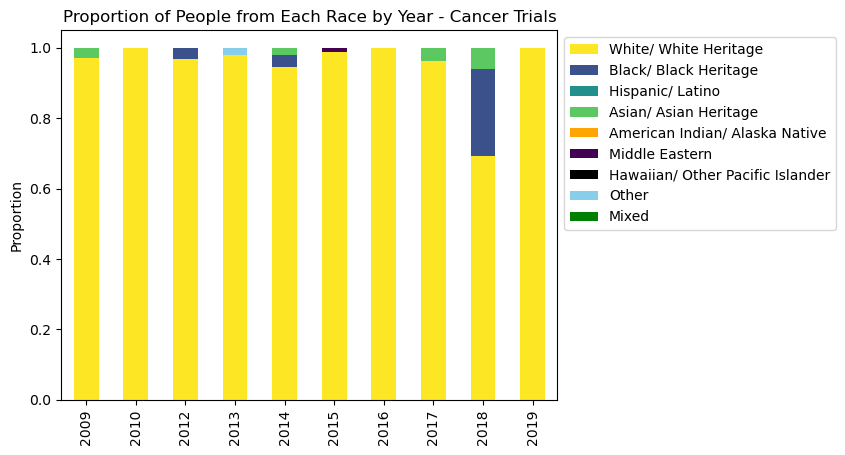

In [207]:
# Group the trials by year and race, and calculate the total count for each race by year
race_count_by_year = cancer_race.groupby('year')[['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']].sum()

# Calculate the proportion for each race by year
race_proportion_by_year = race_count_by_year.div(race_count_by_year.sum(axis=1), axis=0)

# Define the colors for each race/ethnicity
# Plot the proportion of trials reporting each race/ethnicity over time
colors = ['#fde624', '#3b518b', '#21908c', '#5cc862', 'orange', '#430154','black','skyblue','green']


# Plot the composite bar chart
plt.figure(figsize=(10, 6))
race_proportion_by_year.plot(kind='bar', stacked=True, color=colors)
plt.ylabel('Proportion')
plt.xlabel('')
plt.title('Proportion of People from Each Race by Year - Cancer Trials')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False)

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/stacked_bar_CANCER_100.png', dpi=300)

plt.show()

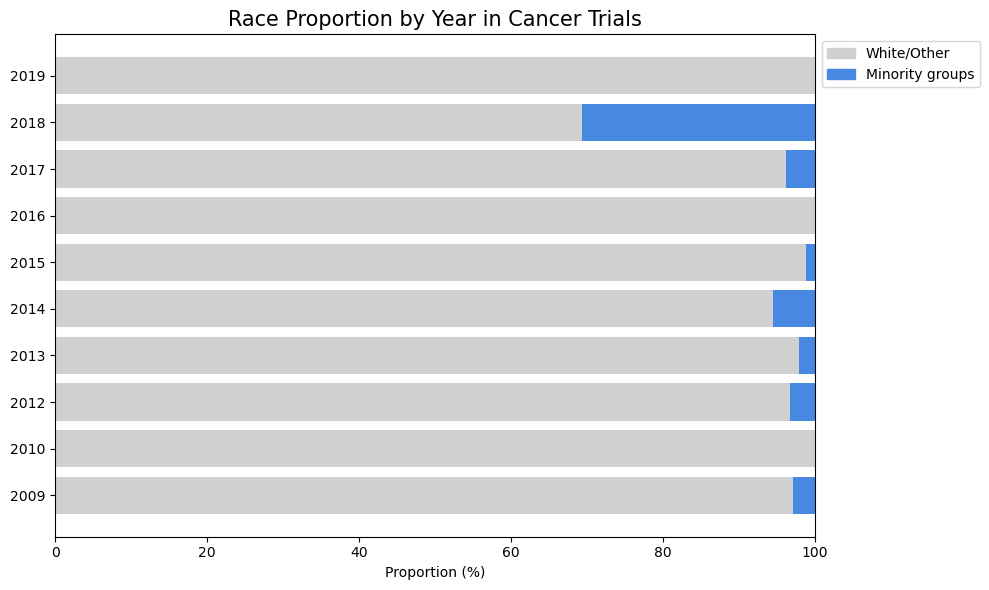

In [208]:
# Define the race categories and colors
race_categories = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']
race_colors = ['#d0d0d0', '#4789e2', '#4789e2', '#4789e2','#4789e2', '#4789e2', '#4789e2','#4789e2', '#4789e2']

# Set the years and their index positions
years = race_proportion_by_year.index
years_idx = range(len(years))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the horizontal stacked bars
bars = []
for i, race in enumerate(race_categories):
    proportion = race_proportion_by_year.loc[:, race] * 100
    bottom = race_proportion_by_year.loc[:, race_categories[:i]].sum(axis=1) * 100
    bars.append(ax.barh(years_idx, proportion, color=race_colors[i], left=bottom))

# Set the y-axis ticks and labels
ax.set_yticks(years_idx)
ax.set_yticklabels(years)

# Set the x-axis label
ax.set_xlabel('Proportion (%)')

# Set the chart title
ax.set_title('Race Proportion by Year in Cancer Trials', fontsize=15)

# Create a custom legend
legend_labels = ['White/Other','Minority groups']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=race_colors[0]), plt.Rectangle((0, 0), 1, 1, color=race_colors[-1])]
ax.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1))

# Adjust the layout
plt.tight_layout()

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/horizontal_stacked_bar_chart.png', dpi=300)

# Show the plot
plt.show()

In [209]:
cancer_race_dummies = cancer_race.copy()

# Create dummy variables for race columns
race_columns = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed']

# Convert zeros to null for race columns
cancer_race_dummies[race_columns] = cancer_race_dummies[race_columns].replace(0, np.nan)

# Convert null values to 0 and non-null values to 1 for race columns
cancer_race_dummies[race_columns] = cancer_race_dummies[race_columns].notnull().astype(int).fillna(0)

cancer_race_dummies.head()

,nct_id,start_date_x,brief_title,official_title,overall_status,phase,enrollment,enrollment_type,number_of_arms,results,...,Hawaiian/ Other Pacific Islander,Hispanic/ Latino,Middle Eastern,Mixed,Other,Unknown or Not Reported,White/ White Heritage,uk_races_dum,count,year
0,NCT00977431,2009-09-17,Open Label Trial to Explore Safety of Combinin...,"Phase I, Open Label Trial to Explore Safety of...",Completed,Phase 1,36.0,Actual,2.0,1,...,0,0,0,0,0,0.0,1,0,1,2009
1,NCT01185548,2010-07-31,A Drug Interaction Study of Tasisulam in Patie...,The Effect of Tasisulam on the CYP2C9-Mediated...,Terminated,Phase 1,4.0,Actual,1.0,1,...,0,0,0,0,0,0.0,1,0,1,2010
2,NCT01559818,2012-02-29,A Long Term Follow up Study for Patients Who P...,An Open Label Long Term Follow up Study for Pa...,Terminated,Phase 1/Phase 2,10.0,Actual,1.0,1,...,0,0,0,0,0,0.0,1,0,1,2012
3,NCT01743560,2013-01-31,An Open Label Study of Postmenopausal Women Wi...,"A Phase IV Multicentre, Open Label Study of Po...",Completed,Phase 4,52.0,Actual,1.0,1,...,0,0,0,0,1,0.0,1,0,1,2013
4,NCT01791985,2012-07-31,AZD4547 & Anastrozole or Letrozole (NSAIs) in ...,A Single Arm Phase IIa Study (With Combination...,Completed,Phase 1/Phase 2,52.0,Actual,1.0,1,...,0,0,0,0,0,1.0,1,0,1,2012


In [210]:
cancer_race_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   nct_id                            18 non-null     object        
 1   start_date_x                      18 non-null     object        
 2   brief_title                       18 non-null     object        
 3   official_title                    18 non-null     object        
 4   overall_status                    18 non-null     object        
 5   phase                             18 non-null     object        
 6   enrollment                        18 non-null     float64       
 7   enrollment_type                   18 non-null     object        
 8   number_of_arms                    18 non-null     float64       
 9   results                           18 non-null     int64         
 10  start_date_y                      18 non-null     da

In [211]:
cancer_race_table = cancer_race_dummies.iloc[:,[9,11,12,13,14,15,16,17,18,19,20,21,22,23]]

In [212]:
# Reshape the dataframe using melt
melted_df = cancer_race_table.melt(id_vars='count', var_name='Race', value_name='Count')

# Calculate the sum for each race
cancer_race_table = melted_df.groupby('Race')['Count'].sum()

In [213]:
# Create the dataframe
cancer_race_table = pd.DataFrame(cancer_race_table)

In [214]:
cancer_race_table.reset_index(inplace=True)
cancer_race_table

,Race,Count
0,American Indian/ Alaska Native,0.0
1,Asian/ Asian Heritage,4.0
2,Black/ Black Heritage,3.0
3,Hawaiian/ Other Pacific Islander,0.0
4,Hispanic/ Latino,0.0
5,Middle Eastern,1.0
6,Mixed,0.0
7,Other,1.0
8,Unknown or Not Reported,18.0
9,White/ White Heritage,18.0


In [215]:
cancer_race_table['Proportion of trials (%)'] = round((cancer_race_table['Count'] / 18)*100,2)

In [216]:
cancer_race_table

,Race,Count,Proportion of trials (%)
0,American Indian/ Alaska Native,0.0,0.00
1,Asian/ Asian Heritage,4.0,22.22
2,Black/ Black Heritage,3.0,16.67
3,Hawaiian/ Other Pacific Islander,0.0,0.00
4,Hispanic/ Latino,0.0,0.00
5,Middle Eastern,1.0,5.56
6,Mixed,0.0,0.00
7,Other,1.0,5.56
8,Unknown or Not Reported,18.0,100.00
9,White/ White Heritage,18.0,100.00


In [217]:
# Define the race order for plotting
race_order = ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed','uk_races_dum']

# Sort the dataframe based on the race_order
cancer_race_table_sorted = cancer_race_table[cancer_race_table['Race'].isin(race_order)].sort_values('Race', key=lambda x: x.map({k: i for i, k in enumerate(race_order)}))

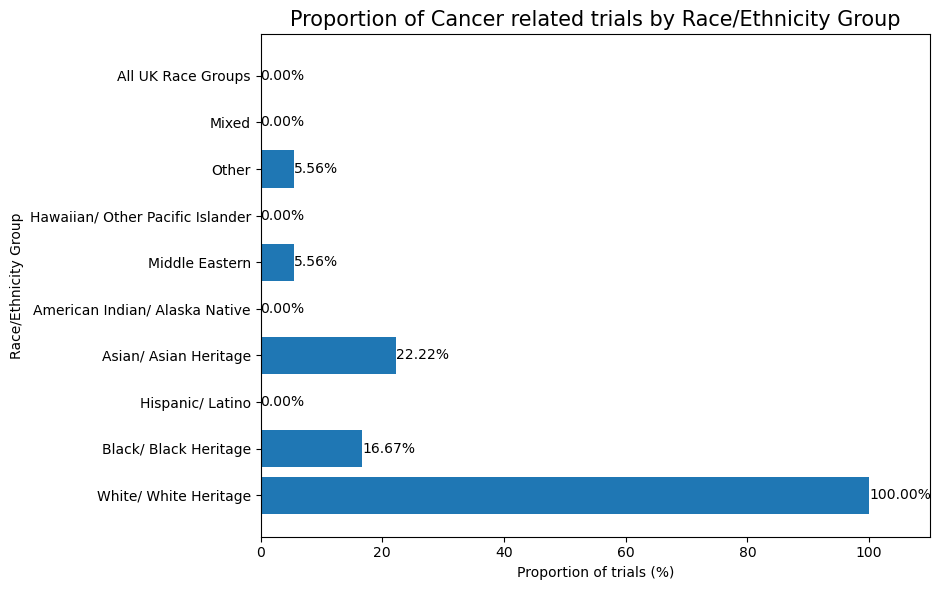

In [218]:
# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(cancer_race_table_sorted['Race'], cancer_race_table_sorted['Proportion of trials (%)'])

# Customize the plot
plt.title('Proportion of Cancer related trials by Race/Ethnicity Group', fontsize=15)
plt.ylabel('Race/Ethnicity Group')
plt.xlabel('Proportion of trials (%)')
plt.xticks(rotation=0)
plt.xlim(0, 110)

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', ha='left', va='center')

# Change the label for 'uk_races_dum'
plt.yticks(range(len(cancer_race_table_sorted)), ['White/ White Heritage' ,'Black/ Black Heritage','Hispanic/ Latino','Asian/ Asian Heritage' ,'American Indian/ Alaska Native', 'Middle Eastern' ,'Hawaiian/ Other Pacific Islander','Other' ,'Mixed', 'All UK Race Groups'])

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1])  

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/cancer_proportion_horizontal_barchart.png', dpi=300)

# Display the plot
plt.show()

In [219]:
# Create a copy of the cancer_race DataFrame
cancer_race_dummy = cancer_race.copy()

# Create dummy variables for cancer-related terms in the title and description columns
for term in cancer_terms:
    cancer_race_dummy[f'dummy_{term}'] = cancer_race_dummy['brief_title'].str.contains(term, case=False) | cancer_race_dummy['official_title'].str.contains(term, case=False)
    cancer_race_dummy[f'dummy_{term}'] = cancer_race_dummy[f'dummy_{term}'].astype(int)

/tmp/ipykernel_195/997304004.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



In [220]:
# Create an empty dataframe
cancer_terms_df = pd.DataFrame()

# Extract the columns corresponding to the cancer_terms
for term in cancer_terms:
    column_name = f'dummy_{term}'
    cancer_terms_df[column_name] = cancer_race_dummy[column_name]

# Display the resulting datafram
cancer_terms_df

,dummy_cancer,dummy_tumor,dummy_tumour,dummy_carcinoma,dummy_lymphoma,dummy_leukemia,dummy_sarcoma,dummy_glioblastoma,dummy_glioma,dummy_neuroblastoma,...,dummy_edwig,dummy_schwannoma,dummy_verner-morrison,dummy_waldenström,dummy_von recklinghausen,dummy_von hippel-lindau,dummy_peutz-jeghers,dummy_neurofibromatosis type 2,dummy_carney,dummy_gorlin
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


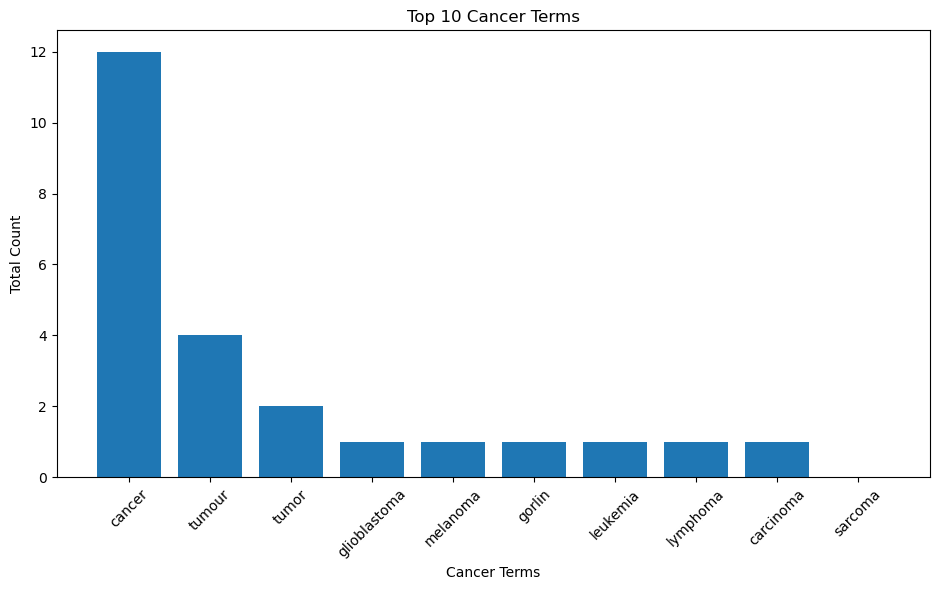

In [221]:
# Calculate the total count for each column
column_totals = cancer_terms_df.sum()

# Sort the columns by total count in descending order
sorted_columns = column_totals.sort_values(ascending=False)

# Select the top 10 columns
top_10_columns = sorted_columns[:10]

# Remove the "dummy_" part from the column names
column_labels = [col.replace('dummy_', '') for col in top_10_columns.index]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(column_labels, top_10_columns.values)

# Customize the plot
plt.title('Top 10 Cancer Terms')
plt.xlabel('Cancer Terms')
plt.ylabel('Total Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the figure layout to ensure all content is visible
plt.tight_layout(rect=[0, 0, 0.95, 1])  

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/cancer_terms.png', dpi=300)

# Display the plot
plt.show()

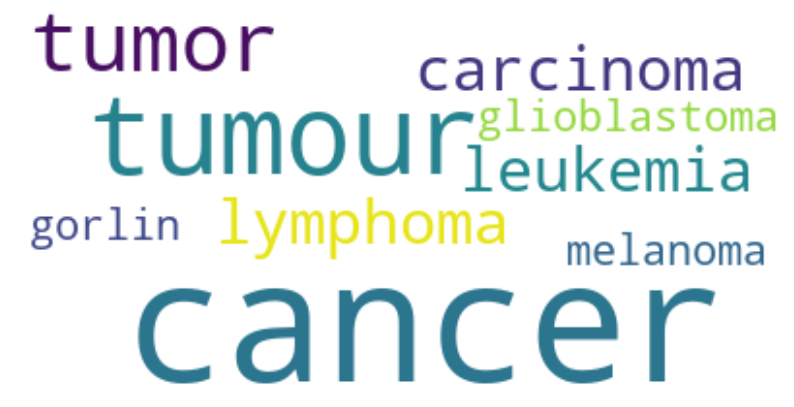

In [222]:
# Preprocess the word labels by removing the "dummy_" part
word_labels = column_totals.index.str.replace('dummy_', '')

# Create a dictionary of word labels and their corresponding counts
word_dict = dict(zip(word_labels, column_totals.values))

# Generate the word cloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Most Frequent terms for Cancer')

# Save the chart as an image file
plt.savefig('/project/charts_uk_exclusive/cancer_wordcloud.png', dpi=300)

plt.show()

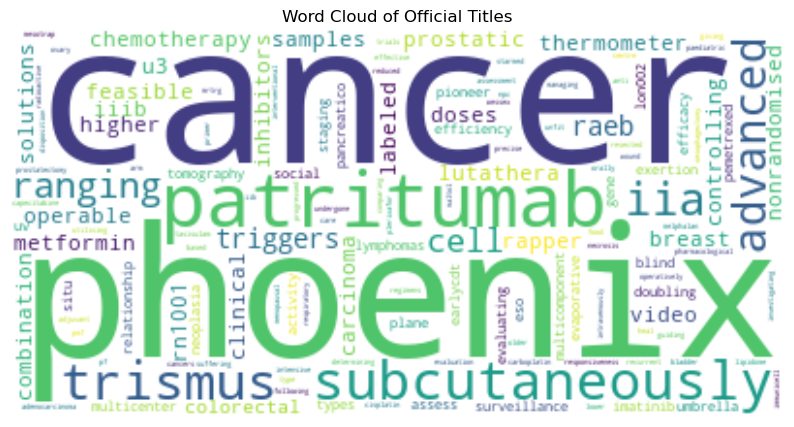

In [223]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe with only the relevant column
df_text = cancer_df[['official_title']].copy()

# Replace missing values with empty strings
df_text['official_title'].fillna('', inplace=True)

# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df_text['official_title'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Remove irrelevant words
irrelevant_words = ['study', 'phase', 'randomized', 'controlled', 'trial']
feature_names = [word for word in feature_names if word not in irrelevant_words]

# Calculate the TF-IDF scores for each word
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

# Create a dictionary of word frequencies
word_frequencies = dict(zip(feature_names, tfidf_scores))

# Create a word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate_from_frequencies(word_frequencies)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Official Titles')
plt.show()